## Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Understanding and Defining Churn

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

This project is based on the Indian and Southeast Asian market.

## Definitions of Churn

There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’. 
The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas. 

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. 
A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, we will use the usage-based definition to define churn.

## High Value Churn

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, we will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

## Understanding the dataset

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## Understanding Customer Behaviour During Churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

   ## Imports

In [1]:
#pip install -U scikit-learn

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np

# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#statsmodels
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
#sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Imputer from sklearn.impute 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# RFE import
from sklearn.feature_selection import RFE

## Reading and Understanding the Data

In [5]:
# Importing all datasets
churn_data = pd.read_csv("telecom_churn_data.csv")
churn_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  \
0     7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  197.385  214.816  213.803   21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            NaN            NaN           0.00            NaN            NaN            NaN           0.00            NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN           NaN           NaN          0.00           NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN   
1     7001865778        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   34.047  355.074  268.321   86.285        24.11        78.68         7.68        18.34         15.74         99.84        304.76         53.76            0.0           0.00           0.00           0.00            0.0           0.00           0.00           0.00             23.88             74.56              7.68             18.34             11.51             75.94            291.86             53.76              0.00              0.00              0.00              0.00               0.0              2.91              0.00              0.00         35.39        150.51        299.54         72.11              0.23              4.11              0.00              0.00              0.00              0.46              0.13              0.00              0.00              0.00              0.00               0.0   
2     7001625959        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  167.690  189.058  210.226  290.714        11.54        55.24        37.26        74.81        143.33        220.59        208.36        118.91            0.0           0.00           0.00          38.49            0.0           0.00           0.00          70.94              7.19             28.74             13.58             14.39             29.34             16.86             38.46             28.16             24.11             21.79             15.61             22.24               0.0            135.54             45.76              0.48         60.66         67.41         67.66         64.81              4.34             26.49             22.58              8.76             41.81             67.41             75.53              9.28              1.48             14.76             22.83               0.0   
3     7001204172        109             0.0            

In [6]:
churn_data.shape

(99999, 226)

In [7]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [8]:
# Checking Null values%
round(100*(churn_data.isnull().sum()/len(churn_data.index)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

## Data Preparation and Cleaning

### Filter high-value customers

We need to predict churn only for the high-value customers. 
Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [9]:
churn_data['avg_total_rech_amt_6_7'] = churn_data[['total_rech_amt_6', 'total_rech_amt_7']].mean(axis=1)

In [10]:
churn_data = churn_data[churn_data.avg_total_rech_amt_6_7 >= churn_data.avg_total_rech_amt_6_7.quantile(.70)]

In [11]:
# Average columns will be added later
churn_data.drop(['avg_total_rech_amt_6_7'],inplace=True,axis=1)
churn_data.shape

(30011, 226)

### Tag churners

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9
total_og_mou_9
vol_2g_mb_9
vol_3g_mb_9

In [12]:
churn_data['churn'] = np.where(  (churn_data.total_ic_mou_9 == 0)
                               & (churn_data.total_og_mou_9 == 0)
                               & (churn_data.vol_2g_mb_9 == 0)
                               & (churn_data.vol_3g_mb_9 == 0), 1, 0)

In [13]:
churn_data['churn'].value_counts()

0    27418
1     2593
Name: churn, dtype: int64

8.64016527273333


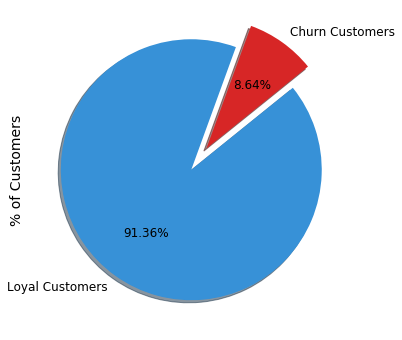

In [14]:
churn_percent = (sum(churn_data['churn'])/len(churn_data.index))*100
print(churn_percent)

plt.figure(figsize=(12, 6))
colors = ["#3791D7", "#D72626"]
labels = "Loyal Customers", "Churn Customers"
churn_data["churn"].value_counts().plot.pie(explode=[0,0.2], autopct='%1.2f%%', shadow=True, colors=colors, labels=labels, fontsize=12, startangle=70)
plt.ylabel('% of Customers', fontsize=14)
plt.show()

In [15]:
churn_data.shape

(30011, 227)

### Rename few of the attributes for consistency

In [16]:
# Rename the vbc columns for consistency with other columns
churn_data.rename(columns = {'jun_vbc_3g':'vbc_3g_6' , 'jul_vbc_3g':'vbc_3g_7', 
                             'aug_vbc_3g':'vbc_3g_8' , 'sep_vbc_3g':'vbc_3g_9' }, inplace = True)

# Rename the last_day_rch_amt columns to last_day_rech_amt for consistency
churn_data.rename(columns = {'last_day_rch_amt_6':'last_day_rech_amt_6' , 'last_day_rch_amt_7':'last_day_rech_amt_7',
                             'last_day_rch_amt_8':'last_day_rech_amt_8' , 'last_day_rch_amt_9':'last_day_rch_amt_9'},
                  inplace = True)

### Remove all the attributes corresponding to the churn phase

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [17]:
churn_data = churn_data.loc[:,~churn_data.columns.str.endswith('_9')]

churn_data.shape

(30011, 172)

### Removing high NULL value features/columns

Drop features/columns that have more than 60% NULL values

In [18]:
# Checking Null values%
round(100*(churn_data.isnull().sum()/len(churn_data.index)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.38
std_og_t2o_mou               0.38
loc_ic_t2o_mou               0.38
last_date_of_month_6         0.00
last_date_of_month_7         0.10
last_date_of_month_8         0.52
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.05
onnet_mou_7                  1.01
onnet_mou_8                  3.13
offnet_mou_6                 1.05
offnet_mou_7                 1.01
offnet_mou_8                 3.13
roam_ic_mou_6                1.05
roam_ic_mou_7                1.01
roam_ic_mou_8                3.13
roam_og_mou_6                1.05
roam_og_mou_7                1.01
roam_og_mou_8                3.13
loc_og_t2t_mou_6             1.05
loc_og_t2t_mou_7             1.01
loc_og_t2t_mou_8             3.13
loc_og_t2m_mou_6             1.05
loc_og_t2m_mou_7             1.01
loc_og_t2m_mou_8             3.13
loc_og_t2f_mou

In [19]:
# Drop features/columns that have more than 60% NULL values
churn_data = churn_data.dropna(thresh=churn_data.shape[0]*0.6, how='all', axis=1)

### Drop date columns

In [20]:
# Drop the date columns as they don't seem to hold significance
for col in churn_data.columns:
    if 'date' in col:
        churn_data.drop(col,inplace=True,axis=1)

churn_data.shape

(30011, 136)

### Drop columns which have only one unique value

In [21]:
# Drop features that have only one unique value
for col in churn_data.columns:
    if (churn_data[col].nunique() == 1):
        print(col)
        churn_data.drop(col,inplace=True,axis=1)

churn_data.shape

circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8


(30011, 126)

In [22]:
# No duplicate mobile number rows
print(churn_data.mobile_number.nunique())
# Drop mobile number column
churn_data.drop('mobile_number',inplace=True,axis=1)

30011


### Outlier treatment

In [23]:
churn_data.describe(percentiles=[.99,.95,.9,.75,.25,.1,.05,.01])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8   og_others_6   og_others_7   og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  \
count  30011.000000  30011.000000  30011.000000  29695.000000  29708.000000  29073.000000  29695.000000  29708.000000  29073.000000   29695.000000   29708.000000   29073.000000   29695.000000   29708.000000   29073.000000      29695.000000      29708.000000      29073.000000      29695.000000      29708.000000      29073.000000      29695.000000      29708.000000      29073.000000      29695.000000      29708.000000      29073.000000  29695.000000  29708.000000  29073.000000      29695.000000      29708.000000      29073.000000      29695.000000      29708.000000      29073.000000      29695.000000      29708.000000      29073.000000  29695.000000  29708.000000  29073.000000  29695.000000  29708.000000  29073.000000  29695.000000  29708.000000  29073.000000  29695.000000  29708.000000  29073.000000    30011.000000    30011.000000    30011.000000      29695.000000      29708.000000      29073.000000      29695.000000      29708.000000      29073.000000      29695.000000   
mean     587.284404    589.135427    534.857433    299.184718    307.447285    276.234168    422.380819    428.248096    387.121245      17.598062      13.660030      13.683965      29.633675      22.260754      22.161948         95.688242         96.706103         89.951446        183.208674        183.120362        172.998297          7.053601          7.169655          6.703844          1.583837          1.881222          1.767998    285.959416    287.005181    269.662288        191.772393        201.916113        177.752086        205.259036        215.588560        185.362328          2.032163          2.054989          1.847471    399.067969    419.564032    364.965911      2.288522      2.229914      2.094787      5.979323      7.501222      7.107334      0.699876      0.048085      0.061039      686.697541      709.124730      623.774684         69.480649         71.028476         68.064333        161.312344        162.453208        158.585128         15.761590   
std      442.722413    462.897814    492.259586    462.202367    483.244786    471.505518    471.096294    487.103204    480.279273      79.552216      76.679599      75.706579     119.160857      98.397962     107.874014        237.903645        249.205463        237.947663        250.755724        241.245958        236.653042         22.774304         22.692338         20.509418          6.923971          9.300807          7.509452    380.873082    376.646673    369.341135        411.420669        429.818676        415.409296        415.149605        439.636272        422.152597         12.521796         13.416765         11.883145    608.350635    639.300752    622.748058     46.161171     45.850893     45.510330     18.710136     23.170819     23.225842      2.292307      2.755729      3.373442      660.356820      685.071178      685.983313        159.329635        168.015550        157.735902        222.564453        219.943309        218.709960         46.041807   
min    -2258.709000  -2014.045000   -945.808000      0.000000    

In [24]:
for col in churn_data.columns:
    if(col != "churn"):
        Q90 = churn_data[col].quantile(0.9)  
        churn_data[col] = np.clip(churn_data[col], 0, Q90)

In [25]:
churn_data.describe(percentiles=[.99,.95,.9,.75,.25,.1,.05,.01])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8   og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  \
count  30011.000000  30011.000000  30011.000000  29695.000000  29708.000000  29073.000000  29695.000000  29708.000000  29073.000000   29695.000000   29708.000000   29073.000000   29695.000000   29708.000000   29073.000000      29695.000000      29708.000000      29073.000000       29695.00000      29708.000000      29073.000000      29695.000000      29708.000000      29073.000000      29695.000000      29708.000000       29073.00000  29695.000000  29708.000000  29073.000000      29695.000000      29708.000000      29073.000000      29695.000000      29708.000000      29073.000000      29695.000000       29708.00000      29073.000000  29695.000000  29708.000000  29073.000000       29695.0       29708.0       29073.0  29695.000000  29708.000000  29073.000000  29695.000000      29708.0      29073.0    30011.000000    30011.000000    30011.000000      29695.000000      29708.000000      29073.000000      29695.000000      29708.000000      29073.000000      29695.000000   
mean     542.227713    542.813318    486.886713    240.045523    246.025262    212.770364    363.567329    368.412406    328.236154       4.793958       2.520403       2.791390       9.643597       5.738262       5.424119         61.652420         62.063761         58.292823         152.31372        154.100470        144.144699          3.936855          4.032687          3.722066          0.628167          0.768365           0.72538    238.625521    240.536611    225.062692        136.714053        145.001324        118.653941        146.970386        155.158970        126.112353          0.291239           0.28775          0.237275    331.457267    347.748307    290.644877           0.0           0.0           0.0      3.576498      4.677233      4.348452      0.376196          0.0          0.0      613.735821      632.698427      546.125636         49.015845         49.861344         47.508872        133.136479        134.519555        131.236583          9.087061   
std      244.927406    243.659161    277.822261    259.069245    269.288715    241.467571    279.395213    286.909012    270.915603      10.727884       5.992801       6.509554      21.390000      13.495870      12.684049         67.881396         67.726136         65.606968         143.13161        142.278043        139.145971          6.197276          6.285024          5.828584          1.347933          1.611516           1.52802    216.231947    213.381383    210.289616        214.387856        226.835927        195.086474        204.266162        217.788496        183.523277          0.716952           0.71412          0.595495    397.432421    413.785573    373.215211           0.0           0.0           0.0      5.440718      6.680672      6.283322      0.768644          0.0          0.0      442.033319      453.272374      441.177504         50.347484         50.485967         49.148602        118.319994        115.902621        117.354795         13.202501   
min        0.000000      0.000000      0.000000      0.000000      0.0000

### Impute missing values

In [26]:
# Checking Null values%
round(100*(churn_data.isnull().sum()/len(churn_data.index)),2)

arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
onnet_mou_6            1.05
onnet_mou_7            1.01
onnet_mou_8            3.13
offnet_mou_6           1.05
offnet_mou_7           1.01
offnet_mou_8           3.13
roam_ic_mou_6          1.05
roam_ic_mou_7          1.01
roam_ic_mou_8          3.13
roam_og_mou_6          1.05
roam_og_mou_7          1.01
roam_og_mou_8          3.13
loc_og_t2t_mou_6       1.05
loc_og_t2t_mou_7       1.01
loc_og_t2t_mou_8       3.13
loc_og_t2m_mou_6       1.05
loc_og_t2m_mou_7       1.01
loc_og_t2m_mou_8       3.13
loc_og_t2f_mou_6       1.05
loc_og_t2f_mou_7       1.01
loc_og_t2f_mou_8       3.13
loc_og_t2c_mou_6       1.05
loc_og_t2c_mou_7       1.01
loc_og_t2c_mou_8       3.13
loc_og_mou_6           1.05
loc_og_mou_7           1.01
loc_og_mou_8           3.13
std_og_t2t_mou_6       1.05
std_og_t2t_mou_7       1.01
std_og_t2t_mou_8       3.13
std_og_t2m_mou_6       1.05
std_og_t2m_mou_7       1.01
std_og_t2m_mou_8    

In [27]:
# All missing values are in mou columns
# Impute with value 0 on all other missing values
churn_data = churn_data.fillna(0)

In [28]:
# Checking Null values%
round(100*(churn_data.isnull().sum()/len(churn_data.index)),2)

arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
onnet_mou_6            0.0
onnet_mou_7            0.0
onnet_mou_8            0.0
offnet_mou_6           0.0
offnet_mou_7           0.0
offnet_mou_8           0.0
roam_ic_mou_6          0.0
roam_ic_mou_7          0.0
roam_ic_mou_8          0.0
roam_og_mou_6          0.0
roam_og_mou_7          0.0
roam_og_mou_8          0.0
loc_og_t2t_mou_6       0.0
loc_og_t2t_mou_7       0.0
loc_og_t2t_mou_8       0.0
loc_og_t2m_mou_6       0.0
loc_og_t2m_mou_7       0.0
loc_og_t2m_mou_8       0.0
loc_og_t2f_mou_6       0.0
loc_og_t2f_mou_7       0.0
loc_og_t2f_mou_8       0.0
loc_og_t2c_mou_6       0.0
loc_og_t2c_mou_7       0.0
loc_og_t2c_mou_8       0.0
loc_og_mou_6           0.0
loc_og_mou_7           0.0
loc_og_mou_8           0.0
std_og_t2t_mou_6       0.0
std_og_t2t_mou_7       0.0
std_og_t2t_mou_8       0.0
std_og_t2m_mou_6       0.0
std_og_t2m_mou_7       0.0
std_og_t2m_mou_8       0.0
std_og_t2f_mou_6       0.0
s

### Derived Features along with Univariate and Bivariate Analysis

#### Derive average value columns of 6th and 7th months (action months) and diff value columns

Also drop the 6th and 7th months columns since they are depicted by a corresponding single column.

For example derive avg_arpu_6_7 from arpu_6 and arpu_7 and then drop arpu_6 and arpu_7.

Diff column = arpu_8 - avg_arpu_6_7

In [29]:
for first_col in churn_data.columns:
    if first_col.endswith("_6"):
        second_col = first_col.replace('_6','_7')
        third_col  = first_col.replace('_6','_8')
        avg_col = "avg_"+first_col+"_7"
        #print("Derive ", avg_col, "from ",first_col, second_col)        
        churn_data[avg_col]  = churn_data[[first_col, second_col]].mean(axis=1)
        churn_data.drop([first_col, second_col],inplace=True,axis=1)

In [30]:
churn_data.describe()

arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8   ic_others_8  total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rech_amt_8   vol_2g_mb_8   vol_3g_mb_8  monthly_2g_8   sachet_2g_8  monthly_3g_8  sachet_3g_8           aon      vbc_3g_8         churn  avg_arpu_6_7  avg_onnet_mou_6_7  avg_offnet_mou_6_7  avg_roam_ic_mou_6_7  avg_roam_og_mou_6_7  avg_loc_og_t2t_mou_6_7  avg_loc_og_t2m_mou_6_7  avg_loc_og_t2f_mou_6_7  avg_loc_og_t2c_mou_6_7  avg_loc_og_mou_6_7  avg_std_og_t2t_mou_6_7  avg_std_og_t2m_mou_6_7  avg_std_og_t2f_mou_6_7  avg_std_og_mou_6_7  \
count  30011.000000  30011.000000  30011.000000   30011.000000   30011.000000      30011.000000      30011.000000      30011.000000      30011.000000  30011.000000      30011.000000      30011.000000      30011.000000  30011.000000       30011.0  30011.000000      30011.0    30011.000000      30011.000000      30011.000000      30011.000000  30011.000000      30011.000000      30011.000000      30011.000000  30011.000000    30011.000000       30011.0  30011.000000  30011.000000      30011.000000      30011.000000    30011.000000         30011.000000  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000      30011.0  30011.000000  30011.000000  30011.000000  30011.000000       30011.000000        30011.000000         30011.000000         30011.000000            30011.000000            30011.000000            30011.000000            30011.000000        30011.000000            30011.000000            30011.000000            30011.000000        30011.000000   
mean     486.886713    206.120183    317.977065       2.704145       5.254587         56.470869        139.639427          3.605732          0.702708    218.028311        114.945388        122.170686          0.229859    281.560711           0.0      4.212541          0.0      546.125636         46.023973        127.134757          8.564434    197.522178          6.826229         17.288511          0.626926     29.182576      250.667040           0.0      2.242737      0.194646          9.115458        555.934591      135.756589            79.733998     23.809384    149.837794      0.102396      0.316751      0.116124          0.0   1223.404518     69.284071      0.086402    542.520516         240.529644          362.215980             3.619218             7.611191               61.220199              151.627282                3.943687                0.691080          237.110501              139.405937              149.507652                0.286508          336.102267   
std      277.822261    240.530507    272.696657       6.425400      12.519876         65.365354        139.232054          5.773216          1.509238    210.649621        193.120311        181.960519          0.587567    370.801501           0.0      6.230464          0.0      441.177504         49.075719        117.742025         12.647212    178.308998         10.905558         23.311477          1.336681     36.243493      210.313019           0.0      5.274099      0.418205          6.153103        339.556261       77.342268            75.457519     49.726075    308.702178      0.303173      0.666696      0.320379          0.0    892.201884    145.598521      0.280961    203.421698         247.741092          261.574424             7.081286            14.607120               64.267971              135.744884                5.781189                1.186805          204.963870              208.257067              198.028463                0.620320          377.901638   
min        0.000000      0.000000      0.000000       0.000000   

In [31]:
print(churn_data.shape)

(30011, 84)


In [32]:
#Identifying customers who use roaming
churn_data["roaming_user"] = np.where( (churn_data.avg_roam_ic_mou_6_7 != 0) |                                       
                                       (churn_data.avg_roam_og_mou_6_7 != 0) |
                                       (churn_data.roam_ic_mou_8 != 0) |                                       
                                       (churn_data.roam_og_mou_8 != 0),
                                       1,0
                                    )

#Identifying customers who use std
churn_data["std_user"] = np.where( (churn_data.avg_std_ic_mou_6_7 != 0) |                                       
                                   (churn_data.avg_std_og_mou_6_7 != 0) |
                                   (churn_data.std_ic_mou_8 != 0) |                                       
                                   (churn_data.std_og_mou_8 != 0),
                                   1,0)

#Identifying customers who use internet
churn_data["internet_user"] = np.where(  (churn_data.avg_vol_2g_mb_6_7 != 0) |
                                          (churn_data.avg_vol_3g_mb_6_7 != 0) |
                                          (churn_data.avg_sachet_2g_6_7 !=0) |                                          
                                          (churn_data.avg_vbc_3g_6_7 !=0) |
                                          (churn_data.vol_2g_mb_8 != 0) |
                                          (churn_data.vol_3g_mb_8 != 0) |
                                          (churn_data.sachet_2g_8 !=0)  |
                                          (churn_data.vbc_3g_8 !=0),
                                          1,0
                                       )

df_roaming_user = churn_data.loc[(churn_data["roaming_user"] == 1),:]
df_std_user = churn_data.loc[(churn_data["std_user"] == 1),:]
df_internet_user = churn_data.loc[(churn_data["internet_user"] == 1),:]

#### Analyze roaming mou columns

churn  roaming_user
0      0               17133
       1               10285
1      1                1765
       0                 828
Name: roaming_user, dtype: int64


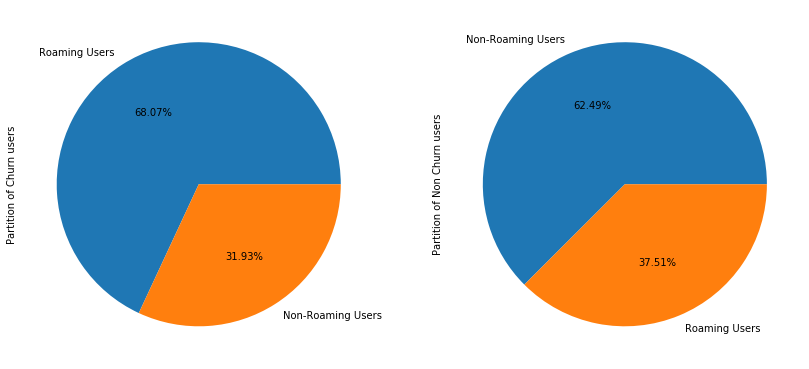

In [33]:
print(churn_data.groupby("churn").roaming_user.value_counts())

df_churn = churn_data.loc[(churn_data["churn"] == 1),:]
df_non_churn = churn_data.loc[(churn_data["churn"] == 0),:]

plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
labels = "Roaming Users", "Non-Roaming Users"
df_churn.roaming_user.value_counts().plot.pie(labels = labels, autopct="%1.2f%%")
plt.ylabel("Partition of Churn users")

plt.subplot(1, 2, 2)
labels = "Non-Roaming Users", "Roaming Users"
df_non_churn.roaming_user.value_counts().plot.pie(labels = labels, autopct="%1.2f%%")
plt.ylabel("Partition of Non Churn users")
plt.show()

Inference ->

Among the churn users, around 69% are roaming users.

Whereas among the non churn users, around 37% are roaming users.

#### Analyze STD Usage minutes

In [34]:
cond = (((churn_data.avg_std_ic_mou_6_7 != 0) &
         (churn_data.std_ic_mou_8 == 0)) | \
        ((churn_data.avg_std_og_mou_6_7 != 0) &
         (churn_data.std_og_mou_8 == 0))
        )

churn_data['std_churn_b'] = np.where(cond, 1, 0)
print(churn_data.groupby(["churn"]).std_churn_b.value_counts())

churn  std_churn_b
0      0              23264
       1               4154
1      1               1432
       0               1161
Name: std_churn_b, dtype: int64


churn  std_churn_b
0      0              23264
       1               4154
1      1               1432
       0               1161
Name: std_churn_b, dtype: int64


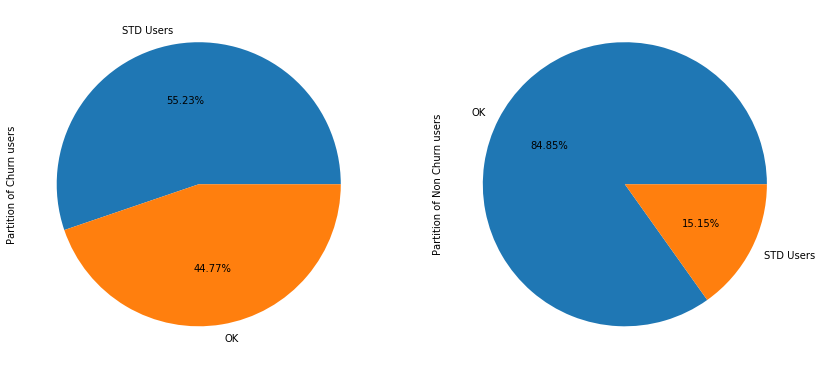

In [35]:
print(churn_data.groupby("churn").std_churn_b.value_counts())

df_churn = churn_data.loc[(churn_data["churn"] == 1),:]
df_non_churn = churn_data.loc[(churn_data["churn"] == 0),:]

plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
labels = "STD Users", "OK"
df_churn.std_churn_b.value_counts().plot.pie(labels = labels, autopct="%1.2f%%")
plt.ylabel("Partition of Churn users")

plt.subplot(1, 2, 2)
labels = "OK", "STD Users"
df_non_churn.std_churn_b.value_counts().plot.pie(labels = labels, autopct="%1.2f%%")
plt.ylabel("Partition of Non Churn users")
plt.show()

Inference ->

Among the churn users, around 56% churn when STD usage is 0 as compared to previous months.

Whereas among the non churn users, 15% user STD usage becomes 0.

#### Analyze aon (age on network) feature

         count         mean         std    min    25%    50%      75%     max
churn                                                                        
0      27418.0  1258.229010  900.245147  180.0  487.0  958.0  2014.75  2846.0
1       2593.0   855.175472  703.818341  180.0  355.0  615.0  1042.00  2846.0


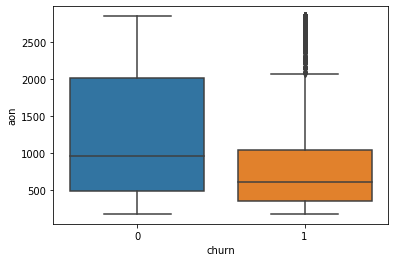

In [36]:
# Boxplot of churned customers vs non-churned customers based on no of days they are with the network.
print(churn_data.groupby("churn").aon.describe())
sns.boxplot(x=churn_data.churn, y=churn_data.aon)

In [37]:
churn_data['customer_new'] = churn_data["aon"].apply(lambda x : 1 if x<1000 else 0)

churn  customer_new
0      1               14121
       0               13297
1      1                1903
       0                 690
Name: customer_new, dtype: int64


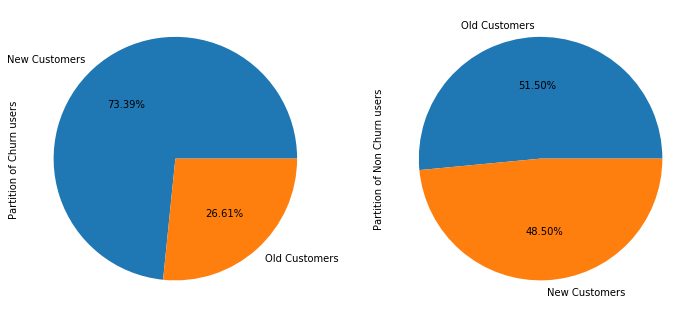

In [38]:
df_churn = churn_data.loc[(churn_data["churn"] == 1),:]
df_non_churn = churn_data.loc[(churn_data["churn"] == 0),:]
print(churn_data.groupby("churn").customer_new.value_counts())

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
labels = "New Customers","Old Customers"
df_churn.customer_new.value_counts().plot.pie(labels = labels, autopct="%1.2f%%")
plt.ylabel("Partition of Churn users")

plt.subplot(1, 2, 2)
labels = "Old Customers","New Customers"
df_non_churn.customer_new.value_counts().plot.pie(labels = labels, autopct="%1.2f%%")
plt.ylabel("Partition of Non Churn users")
plt.show()

Inference ->

Among the churn users, almost 74% are new customers whose aon is less than ~1000 days.

Whereas in non churn users, around 51% are new customers whose aon is less than ~1000 days.

Drop aon as the derived customer_category will be used for modeling

In [39]:
churn_data.drop(['aon'], axis = 1, inplace = True)

#### Analyze arpu (average revenue per user) column

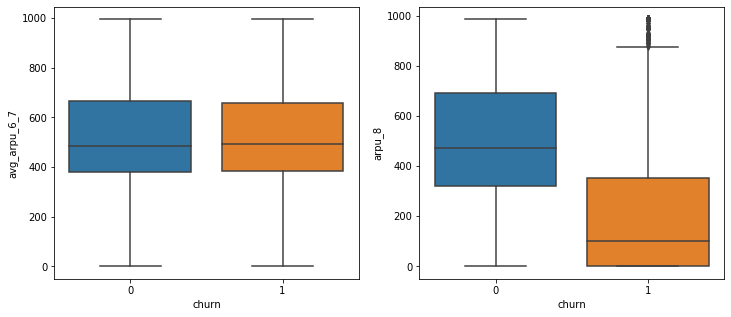

         count        mean         std  min        25%        50%         75%      max
churn                                                                                 
0      27418.0  542.410597  203.531872  0.0  381.12225  484.80025  664.852375  994.828
1       2593.0  543.682773  202.288461  0.0  384.72150  493.80100  658.807500  994.828
         count        mean         std  min       25%      50%      75%      max
churn                                                                           
0      27418.0  512.143237  264.361876  0.0  319.1185  471.024  690.921  985.202
1       2593.0  219.827946  276.250821  0.0    0.0000  101.894  351.028  985.202


In [40]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=churn_data.churn,y=churn_data.avg_arpu_6_7)
plt.subplot(1,2,2)
sns.boxplot(x=churn_data.churn,y=churn_data.arpu_8)
plt.show()
print(churn_data.groupby("churn").avg_arpu_6_7.describe())
print(churn_data.groupby("churn").arpu_8.describe())

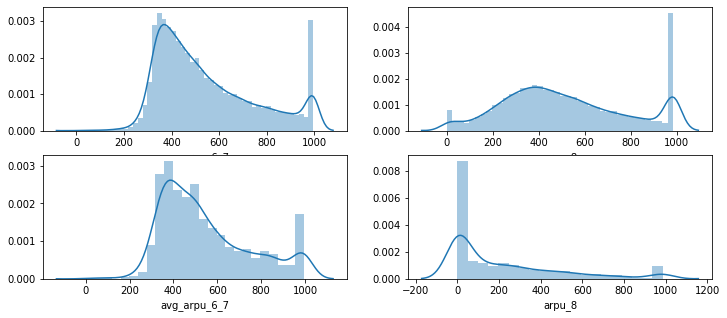

In [41]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
sns.distplot(df_non_churn.avg_arpu_6_7)
plt.subplot(2,2,2)
sns.distplot(df_non_churn.arpu_8)
plt.subplot(2,2,3)
sns.distplot(df_churn.avg_arpu_6_7)
plt.subplot(2,2,4)
sns.distplot(df_churn.arpu_8)
plt.show()

All the distribution plots are right skewed

#### Analyze all the recharge columns

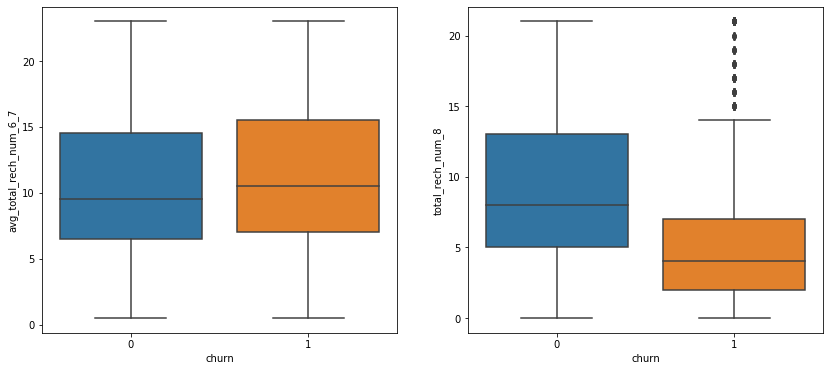

         count       mean       std  min  25%   50%   75%   max
churn                                                          
0      27418.0  10.878656  5.689684  0.5  6.5   9.5  14.5  23.0
1       2593.0  11.441381  5.653173  0.5  7.0  10.5  15.5  23.0
         count      mean       std  min  25%  50%   75%   max
churn                                                        
0      27418.0  9.487235  6.116455  0.0  5.0  8.0  13.0  21.0
1       2593.0  5.184342  5.070486  0.0  2.0  4.0   7.0  21.0


In [42]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
ax1 = sns.boxplot(x="churn",y="avg_total_rech_num_6_7", data = churn_data)
plt.subplot(1,2,2)
ax1 = sns.boxplot(x="churn",y="total_rech_num_8", data = churn_data)
plt.show()
print(churn_data.groupby("churn").avg_total_rech_num_6_7.describe())
print(churn_data.groupby("churn").total_rech_num_8.describe())

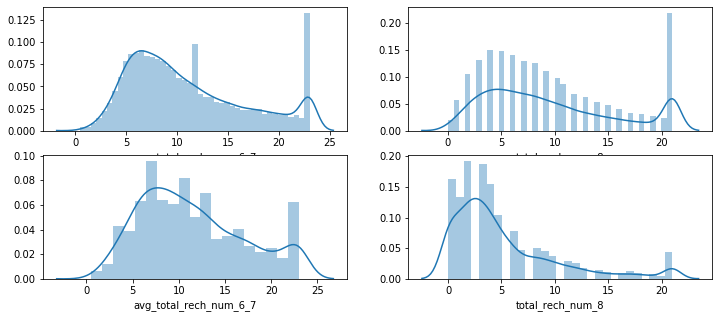

In [43]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
sns.distplot(df_non_churn.avg_total_rech_num_6_7)
plt.subplot(2,2,2)
sns.distplot(df_non_churn.total_rech_num_8)
plt.subplot(2,2,3)
sns.distplot(df_churn.avg_total_rech_num_6_7)
plt.subplot(2,2,4)
sns.distplot(df_churn.total_rech_num_8)
plt.show()

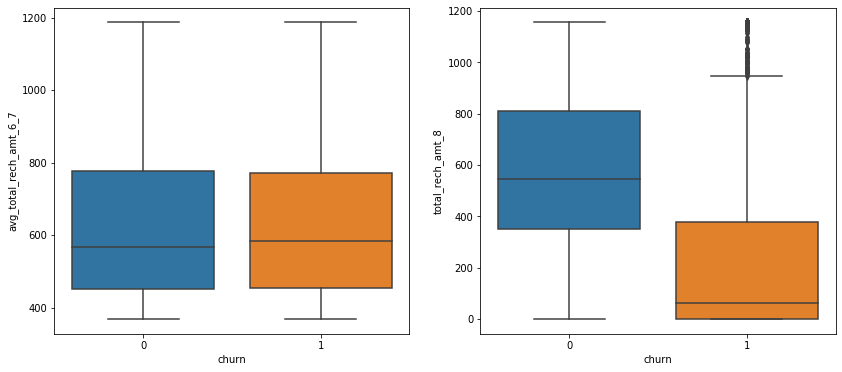

         count        mean         std    min    25%    50%    75%     max
churn                                                                     
0      27418.0  640.705668  236.795671  368.5  450.0  567.5  777.0  1187.0
1       2593.0  639.644234  233.194199  368.5  453.0  583.0  770.5  1187.0
         count        mean         std  min    25%    50%    75%     max
churn                                                                   
0      27418.0  586.520425  324.814424  0.0  350.0  544.0  810.0  1155.0
1       2593.0  232.524489  323.125152  0.0    0.0   62.0  378.0  1155.0


In [44]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
ax1 = sns.boxplot(x="churn",y="avg_total_rech_amt_6_7", data = churn_data)
plt.subplot(1,2,2)
ax1 = sns.boxplot(x="churn",y="total_rech_amt_8", data = churn_data)
plt.show()
print(churn_data.groupby("churn").avg_total_rech_amt_6_7.describe())
print(churn_data.groupby("churn").total_rech_amt_8.describe())

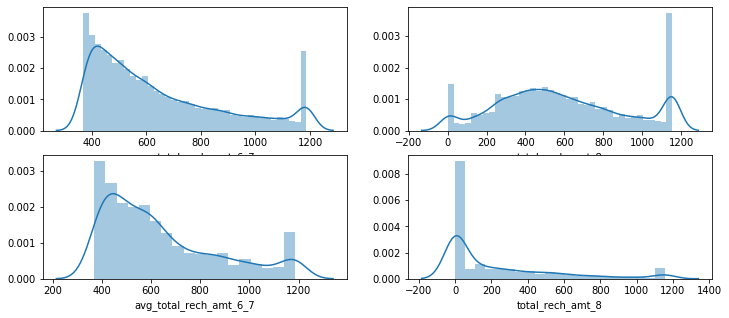

In [45]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
sns.distplot(df_non_churn.avg_total_rech_amt_6_7)
plt.subplot(2,2,2)
sns.distplot(df_non_churn.total_rech_amt_8)
plt.subplot(2,2,3)
sns.distplot(df_churn.avg_total_rech_amt_6_7)
plt.subplot(2,2,4)
sns.distplot(df_churn.total_rech_amt_8)
plt.show()

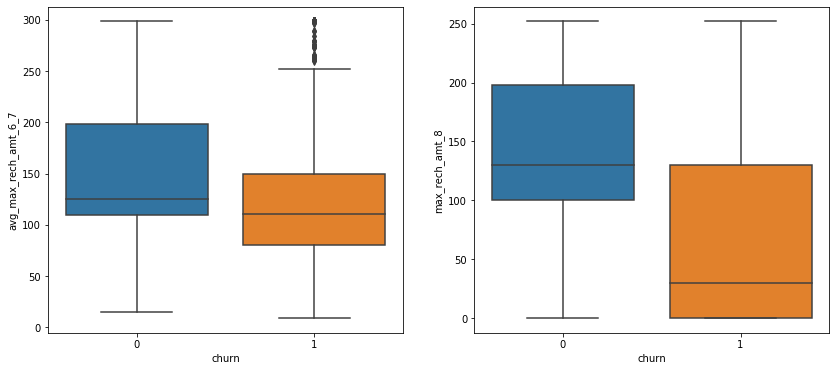

         count        mean        std   min    25%    50%    75%    max
churn                                                                  
0      27418.0  148.719564  71.698574  15.0  110.0  125.0  198.0  298.5
1       2593.0  126.983031  66.287183   9.0   80.0  110.5  150.0  298.5
         count        mean        std  min    25%    50%    75%    max
churn                                                                 
0      27418.0  142.342366  73.825370  0.0  100.0  130.0  198.0  252.0
1       2593.0   66.119553  79.357521  0.0    0.0   30.0  130.0  252.0


In [46]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
ax1 = sns.boxplot(x="churn",y="avg_max_rech_amt_6_7", data = churn_data)
plt.subplot(1,2,2)
ax1 = sns.boxplot(x="churn",y="max_rech_amt_8", data = churn_data)
plt.show()
print(churn_data.groupby("churn").avg_max_rech_amt_6_7.describe())
print(churn_data.groupby("churn").max_rech_amt_8.describe())

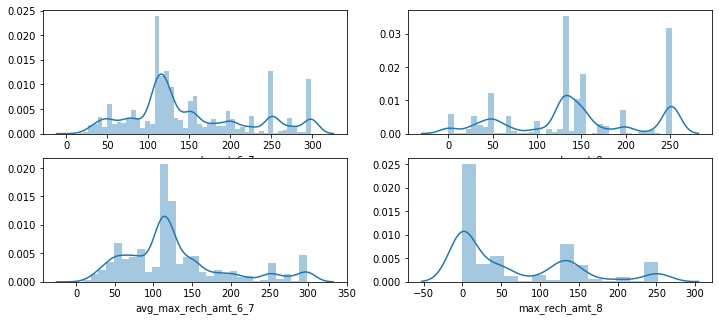

In [47]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
sns.distplot(df_non_churn.avg_max_rech_amt_6_7)
plt.subplot(2,2,2)
sns.distplot(df_non_churn.max_rech_amt_8)
plt.subplot(2,2,3)
sns.distplot(df_churn.avg_max_rech_amt_6_7)
plt.subplot(2,2,4)
sns.distplot(df_churn.max_rech_amt_8)
plt.show()

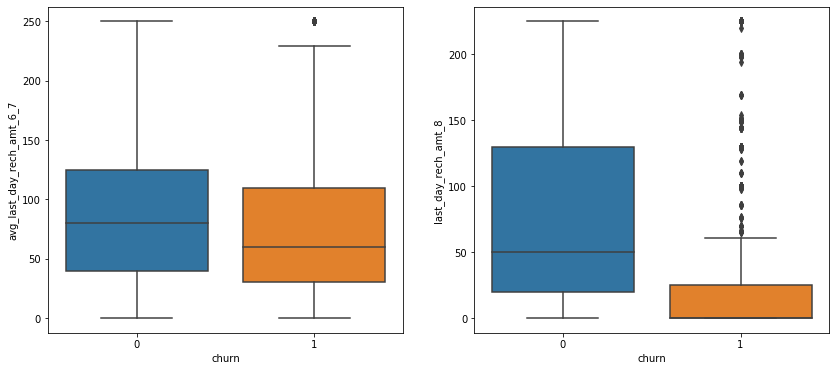

         count       mean        std  min   25%   50%    75%    max
churn                                                              
0      27418.0  91.710920  62.593387  0.0  40.0  80.0  125.0  250.0
1       2593.0  72.286348  54.281870  0.0  30.0  60.0  110.0  250.0
         count       mean        std  min   25%   50%    75%    max
churn                                                              
0      27418.0  84.856408  75.160308  0.0  20.0  50.0  130.0  225.0
1       2593.0  25.570382  54.379743  0.0   0.0   0.0   25.0  225.0


In [48]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
ax1 = sns.boxplot(x="churn",y="avg_last_day_rech_amt_6_7", data = churn_data)
plt.subplot(1,2,2)
ax1 = sns.boxplot(x="churn",y="last_day_rech_amt_8", data = churn_data)
plt.show()
print(churn_data.groupby("churn").avg_last_day_rech_amt_6_7.describe())
print(churn_data.groupby("churn").last_day_rech_amt_8.describe())

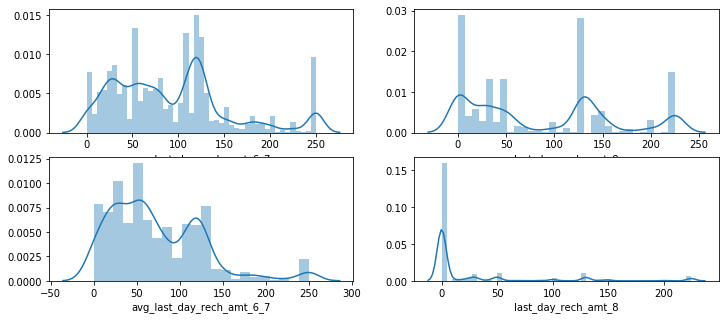

In [49]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
sns.distplot(df_non_churn.avg_last_day_rech_amt_6_7)
plt.subplot(2,2,2)
sns.distplot(df_non_churn.last_day_rech_amt_8)
plt.subplot(2,2,3)
sns.distplot(df_churn.avg_last_day_rech_amt_6_7)
plt.subplot(2,2,4)
sns.distplot(df_churn.last_day_rech_amt_8)
plt.show()

In [50]:
cond = (  ((churn_data['avg_last_day_rech_amt_6_7']!=0) & (churn_data['last_day_rech_amt_8']==0)) | \
          ((churn_data['avg_max_rech_amt_6_7']!=0) & (churn_data['max_rech_amt_8']==0)) | \
          ((churn_data['avg_total_rech_amt_6_7']!=0) & (churn_data['total_rech_amt_8']==0))
       )

churn_data['rech_churn_b'] = np.where(cond, 1, 0)
print(churn_data.groupby(["churn"]).rech_churn_b.value_counts())

churn  rech_churn_b
0      0               22111
       1                5307
1      1                1837
       0                 756
Name: rech_churn_b, dtype: int64


churn  rech_churn_b
0      0               22111
       1                5307
1      1                1837
       0                 756
Name: rech_churn_b, dtype: int64


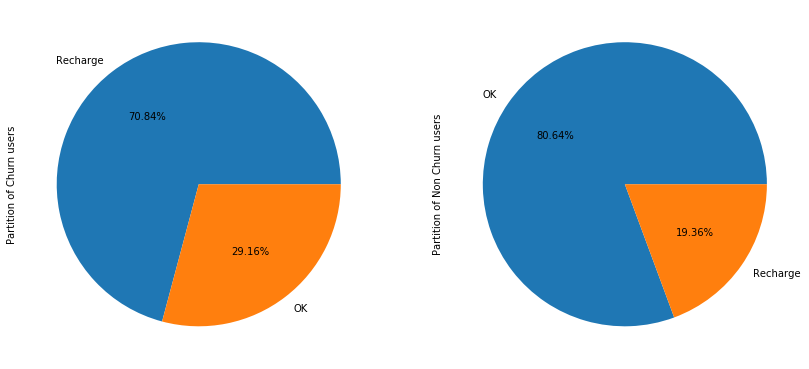

In [51]:
print(churn_data.groupby("churn").rech_churn_b.value_counts())

df_churn = churn_data.loc[(churn_data["churn"] == 1),:]
df_non_churn = churn_data.loc[(churn_data["churn"] == 0),:]

plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
labels = "Recharge", "OK"
df_churn.rech_churn_b.value_counts().plot.pie(labels = labels, autopct="%1.2f%%")
plt.ylabel("Partition of Churn users")

plt.subplot(1, 2, 2)
labels = "OK", "Recharge"
df_non_churn.rech_churn_b.value_counts().plot.pie(labels = labels, autopct="%1.2f%%")
plt.ylabel("Partition of Non Churn users")
plt.show()

Inference ->

Among the churn users, around 70% churn when recharges are 0 as compared to previous months.

Whereas among the non churn users, 20% recharge usage becomes 0.

#### Analyze Internet Usage columns

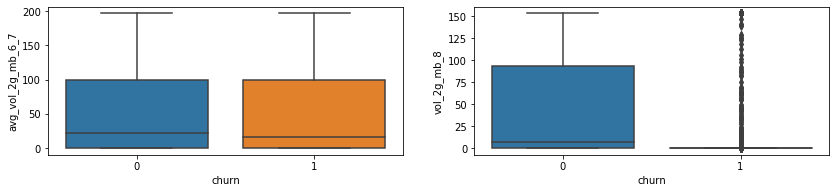

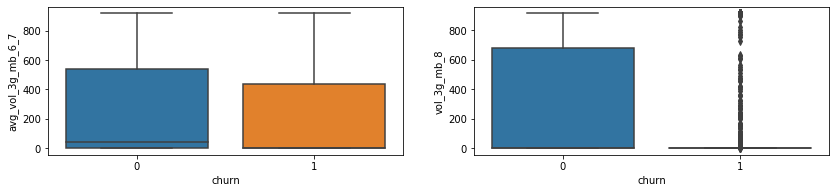

In [52]:
plt.figure(figsize=(14, 6))
plt.subplot(2,2,1)
ax1 = sns.boxplot(x="churn",y="avg_vol_2g_mb_6_7", data = df_internet_user)
plt.subplot(2,2,2)
ax1 = sns.boxplot(x="churn",y="vol_2g_mb_8", data = df_internet_user)

plt.figure(figsize=(14, 6))
plt.subplot(2,2,3)
ax1 = sns.boxplot(x="churn",y="avg_vol_3g_mb_6_7", data = df_internet_user)
plt.subplot(2,2,4)
ax1 = sns.boxplot(x="churn",y="vol_3g_mb_8", data = df_internet_user)
plt.show()

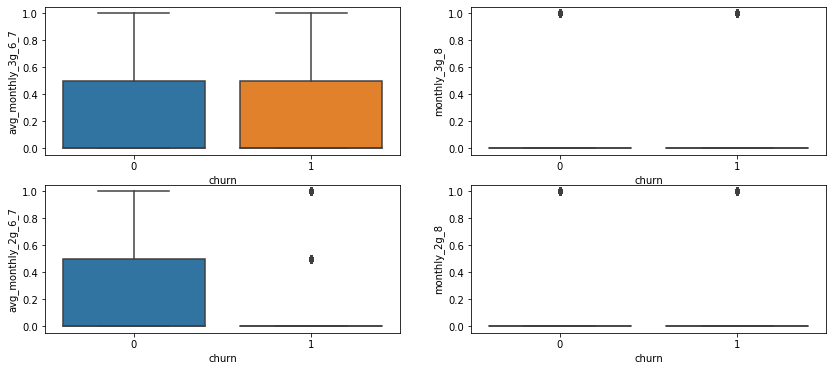

In [53]:
plt.figure(figsize=(14, 6))
plt.subplot(2,2,1)
sns.boxplot(x="churn",y="avg_monthly_3g_6_7", data = df_internet_user)
plt.subplot(2,2,2)
sns.boxplot(x="churn",y="monthly_3g_8", data = df_internet_user)
plt.subplot(2,2,3)
sns.boxplot(x="churn",y="avg_monthly_2g_6_7", data = df_internet_user)
plt.subplot(2,2,4)
sns.boxplot(x="churn",y="monthly_2g_8", data = df_internet_user)
plt.show()

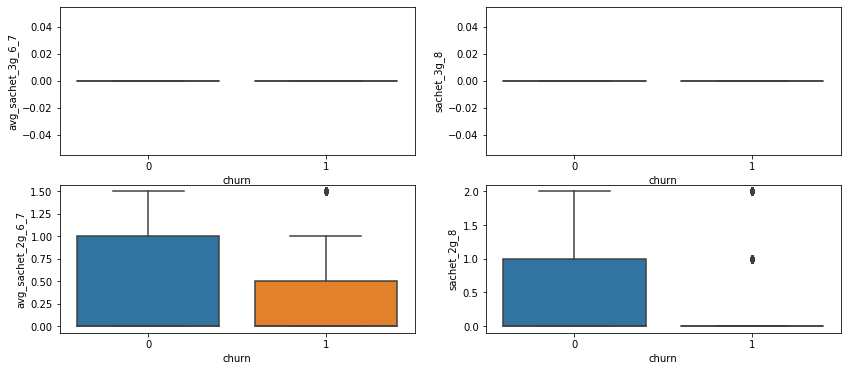

In [54]:
plt.figure(figsize=(14, 6))
plt.subplot(2,2,1)
sns.boxplot(x="churn",y="avg_sachet_3g_6_7", data = df_internet_user)
plt.subplot(2,2,2)
sns.boxplot(x="churn",y="sachet_3g_8", data = df_internet_user)
plt.subplot(2,2,3)
sns.boxplot(x="churn",y="avg_sachet_2g_6_7", data = df_internet_user)
plt.subplot(2,2,4)
sns.boxplot(x="churn",y="sachet_2g_8", data = df_internet_user)
plt.show()

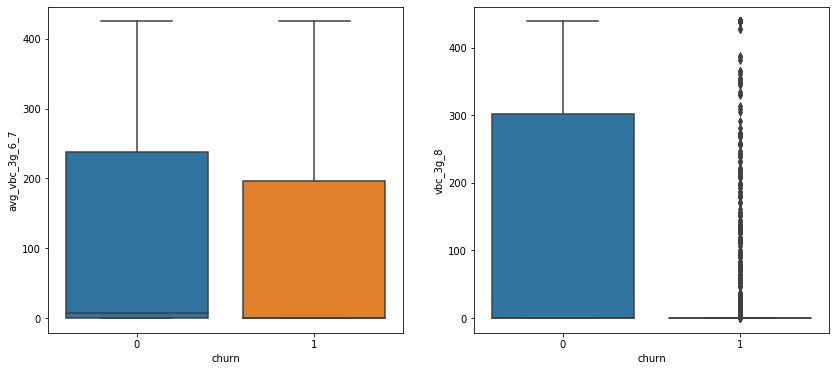

In [55]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.boxplot(x="churn",y="avg_vbc_3g_6_7", data = df_internet_user)
plt.subplot(1,2,2)
sns.boxplot(x="churn",y="vbc_3g_8", data = df_internet_user)
plt.show()

In [56]:
cond = ( ((churn_data['avg_vol_3g_mb_6_7']!=0) & (churn_data['vol_3g_mb_8']==0)) | \
         ((churn_data['avg_sachet_2g_6_7']!=0) & (churn_data['sachet_2g_8']==0)) | \
         ((churn_data['avg_monthly_3g_6_7']!=0) & (churn_data['monthly_3g_8']==0)) | \
         ((churn_data['avg_vbc_3g_6_7']!=0) & (churn_data['vbc_3g_8']==0)) | \
         ((churn_data['avg_vol_2g_mb_6_7']!=0) & (churn_data['vol_2g_mb_8']==0)))

churn_data['internet_churn_b'] = np.where(cond, 1, 0)
print(churn_data.groupby(["churn","internet_user"]).internet_churn_b.value_counts())

churn  internet_user  internet_churn_b
0      0              0                   12085
                      1                      87
       1              0                    9161
                      1                    6085
1      0              0                    1506
                      1                      15
       1              1                     795
                      0                     277
Name: internet_churn_b, dtype: int64


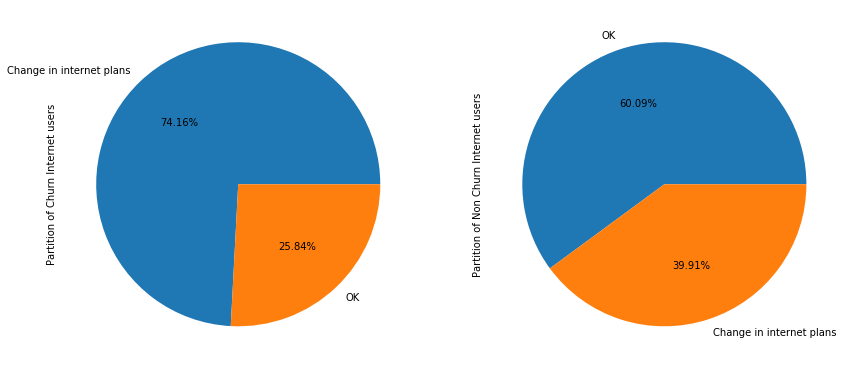

In [57]:
df_internet_churn = churn_data.loc[(churn_data["churn"] == 1) & (churn_data["internet_user"] == 1),:]
df_internet_non_churn = churn_data.loc[(churn_data["churn"] == 0) & (churn_data["internet_user"] == 1),:]

plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
labels = "Change in internet plans","OK"
df_internet_churn.internet_churn_b.value_counts().plot.pie(labels = labels, autopct="%1.2f%%")
plt.ylabel("Partition of Churn Internet users")

plt.subplot(1, 2, 2)
labels = "OK","Change in internet plans"
df_internet_non_churn.internet_churn_b.value_counts().plot.pie(labels = labels, autopct="%1.2f%%")
plt.ylabel("Partition of Non Churn Internet users")
plt.show()

Inference ->

Among the churn internet users, around 75% churn when internet usage changes to 0 as compared to previous months.

Whereas among the non churn internet users, 40% internet usage becomes 0.

In [58]:
### Dropping few insignifanct features
churn_data.drop(['avg_monthly_2g_6_7','monthly_2g_8',
                 'avg_sachet_3g_6_7','sachet_3g_8'], axis = 1, inplace = True)

#### Analysis of minutes of usage columns

In [59]:
print(churn_data.groupby("churn").avg_og_others_6_7.describe())
print(churn_data.groupby("churn").og_others_8.describe())
print(churn_data.groupby("churn").avg_ic_others_6_7.describe())
print(churn_data.groupby("churn").ic_others_8.describe())

         count      mean       std  min  25%  50%    75%   max
churn                                                         
0      27418.0  0.183372  0.380325  0.0  0.0  0.0  0.000  1.14
1       2593.0  0.215147  0.406725  0.0  0.0  0.0  0.105  1.14
         count  mean  std  min  25%  50%  75%  max
churn                                             
0      27418.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1       2593.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
         count      mean       std  min  25%  50%    75%   max
churn                                                         
0      27418.0  0.218001  0.389133  0.0  0.0  0.0  0.265  1.41
1       2593.0  0.170719  0.341725  0.0  0.0  0.0  0.155  1.41
         count      mean       std  min  25%  50%  75%   max
churn                                                       
0      27418.0  0.207067  0.428354  0.0  0.0  0.0  0.1  1.31
1       2593.0  0.063313  0.255339  0.0  0.0  0.0  0.0  1.31


In [60]:
# Dropping as most values are 0
churn_data.drop(['avg_og_others_6_7','og_others_8'],inplace=True,axis=1)
churn_data.drop(['avg_ic_others_6_7','ic_others_8'],inplace=True,axis=1)

         count      mean       std  min  25%  50%  75%   max
churn                                                       
0      27418.0  0.023839  0.047957  0.0  0.0  0.0  0.0  0.14
1       2593.0  0.022071  0.047026  0.0  0.0  0.0  0.0  0.14
         count  mean  std  min  25%  50%  75%  max
churn                                             
0      27418.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1       2593.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
         count      mean       std  min  25%    50%    75%     max
churn                                                             
0      27418.0  4.076361  5.104962  0.0  0.0  1.715  7.005  17.875
1       2593.0  4.169697  5.163465  0.0  0.0  1.850  7.310  17.875
         count      mean       std  min  25%   50%   75%     max
churn                                                           
0      27418.0  4.436447  6.321510  0.0  0.0  0.78  6.94  18.506
1       2593.0  1.844988  4.539584  0.0  0.0  0.00  0.11  18.506


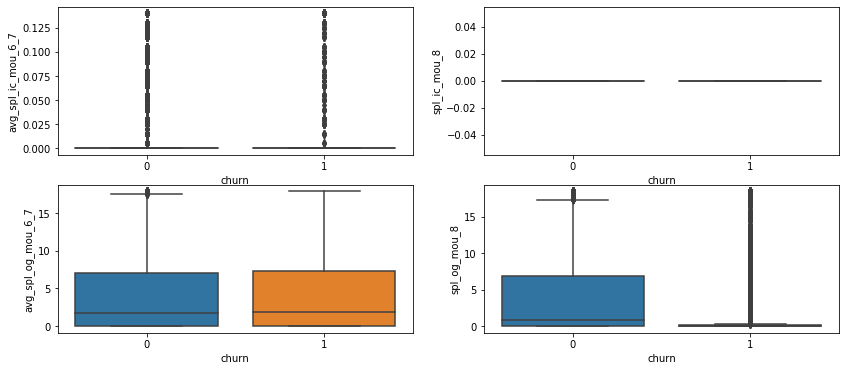

In [61]:
print(churn_data.groupby("churn").avg_spl_ic_mou_6_7.describe())
print(churn_data.groupby("churn").spl_ic_mou_8.describe())
print(churn_data.groupby("churn").avg_spl_og_mou_6_7.describe())
print(churn_data.groupby("churn").spl_og_mou_8.describe())
plt.figure(figsize=(14, 6))
plt.subplot(2,2,1)
sns.boxplot(x="churn",y="avg_spl_ic_mou_6_7", data = churn_data)
plt.subplot(2,2,2)
sns.boxplot(x="churn",y="spl_ic_mou_8", data = churn_data)
plt.subplot(2,2,3)
sns.boxplot(x="churn",y="avg_spl_og_mou_6_7", data = churn_data)
plt.subplot(2,2,4)
sns.boxplot(x="churn",y="spl_og_mou_8", data = churn_data)
plt.show()

In [62]:
# Dropping as most values are 0; and both churn and non churn users show a drop in spl og
churn_data.drop(['avg_spl_ic_mou_6_7','spl_ic_mou_8'],inplace=True,axis=1)

         count      mean       std  min  25%  50%      75%    max
churn                                                            
0      27418.0  0.688769  1.187664  0.0  0.0  0.0  1.02875  4.505
1       2593.0  0.715519  1.177624  0.0  0.0  0.0  1.17000  4.505
         count      mean       std  min  25%  50%   75%   max
churn                                                        
0      27418.0  0.734021  1.535178  0.0  0.0  0.0  0.13  4.65
1       2593.0  0.371612  1.150359  0.0  0.0  0.0  0.00  4.65


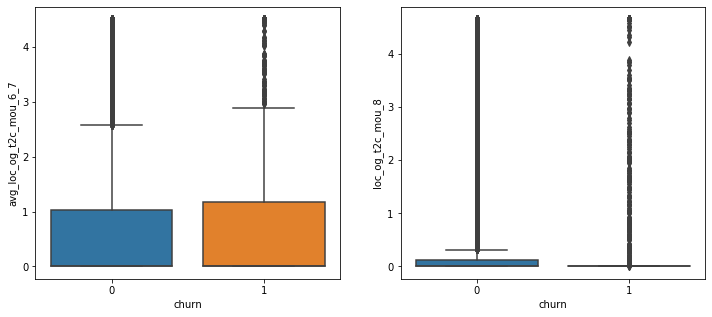

In [63]:
print(churn_data.groupby("churn").avg_loc_og_t2c_mou_6_7.describe())
print(churn_data.groupby("churn").loc_og_t2c_mou_8.describe())
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.boxplot(x="churn",y="avg_loc_og_t2c_mou_6_7", data = churn_data)
plt.subplot(1,2,2)
sns.boxplot(x="churn",y="loc_og_t2c_mou_8", data = churn_data)
plt.show()

In [64]:
churn_data.drop(['avg_loc_og_t2c_mou_6_7','loc_og_t2c_mou_8'],inplace=True,axis=1)

         count        mean         std  min     25%      50%        75%      max
churn                                                                           
0      27418.0  237.803358  246.214048  0.0  48.555  134.545  369.57875  814.679
1       2593.0  269.356997  261.663746  0.0  45.665  165.370  440.63900  814.679
         count        mean         std  min      25%     50%     75%      max
churn                                                                        
0      27418.0  216.772934  242.635811  0.0  34.5875  110.06  318.66  744.754
1       2593.0   93.479556  182.275715  0.0   0.0000    8.23   85.01  744.754
         count        mean         std  min        25%       50%      75%       max
churn                                                                              
0      27418.0  362.386221  260.075077  0.0  156.72625  299.7275  516.175  929.5575
1       2593.0  360.415880  276.978484  0.0  132.63500  289.9600  534.130  929.5575
         count        mean  

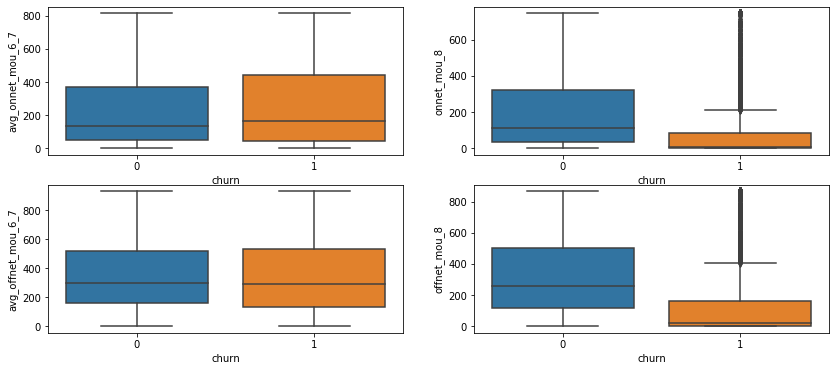

In [65]:
print(churn_data.groupby("churn").avg_onnet_mou_6_7.describe())
print(churn_data.groupby("churn").onnet_mou_8.describe())
print(churn_data.groupby("churn").avg_offnet_mou_6_7.describe())
print(churn_data.groupby("churn").offnet_mou_8.describe())
plt.figure(figsize=(14, 6))
plt.subplot(2,2,1)
sns.boxplot(x="churn",y="avg_onnet_mou_6_7", data = churn_data)
plt.subplot(2,2,2)
sns.boxplot(x="churn",y="onnet_mou_8", data = churn_data)
plt.subplot(2,2,3)
sns.boxplot(x="churn",y="avg_offnet_mou_6_7", data = churn_data)
plt.subplot(2,2,4)
sns.boxplot(x="churn",y="offnet_mou_8", data = churn_data)
plt.show()

In [66]:
print(churn_data.groupby("churn").avg_loc_ic_t2t_mou_6_7.describe())
print(churn_data.groupby("churn").loc_ic_t2t_mou_8.describe())
print(churn_data.groupby("churn").avg_loc_ic_t2m_mou_6_7.describe())
print(churn_data.groupby("churn").loc_ic_t2m_mou_8.describe())
print(churn_data.groupby("churn").avg_loc_ic_t2f_mou_6_7.describe())
print(churn_data.groupby("churn").loc_ic_t2f_mou_8.describe())
print(churn_data.groupby("churn").avg_loc_ic_mou_6_7.describe())
print(churn_data.groupby("churn").loc_ic_mou_8.describe())

         count       mean        std  min       25%     50%       75%      max
churn                                                                         
0      27418.0  50.487897  47.872554  0.0  12.05625  33.440  77.34875  156.717
1       2593.0  32.443501  39.845904  0.0   4.54000  16.785  43.99000  156.717
         count       mean        std  min   25%    50%      75%     max
churn                                                                  
0      27418.0  49.274182  49.405914  0.0  9.43  30.39  75.9375  151.54
1       2593.0  11.656741  27.786462  0.0  0.00   0.00   8.3300  151.54
         count        mean         std  min       25%       50%      75%      max
churn                                                                            
0      27418.0  137.130096  112.401177  0.0  43.71625  103.9525  209.085  368.275
1       2593.0   82.940361   92.161783  0.0  16.89000   49.1150  115.775  368.275
         count        mean         std  min    25%     50%      75% 

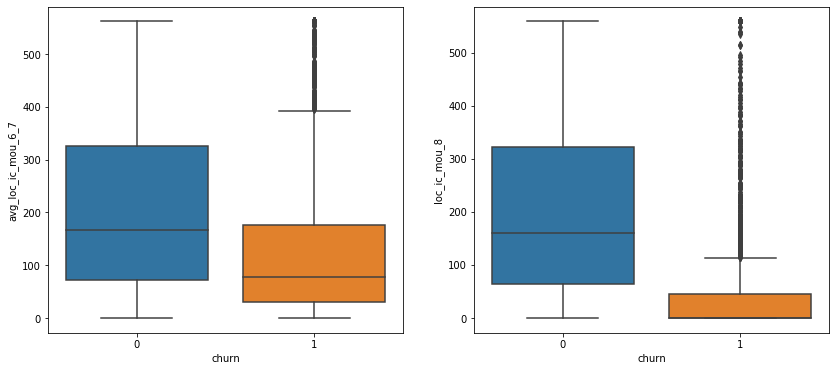

In [67]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.boxplot(x="churn",y="avg_loc_ic_mou_6_7", data = churn_data)
plt.subplot(1,2,2)
sns.boxplot(x="churn",y="loc_ic_mou_8", data = churn_data)
plt.show()

In [68]:
print(churn_data.groupby("churn").avg_loc_og_t2t_mou_6_7.describe())
print(churn_data.groupby("churn").loc_og_t2t_mou_8.describe())
print(churn_data.groupby("churn").avg_loc_og_t2m_mou_6_7.describe())
print(churn_data.groupby("churn").loc_og_t2m_mou_8.describe())
print(churn_data.groupby("churn").avg_loc_og_t2f_mou_6_7.describe())
print(churn_data.groupby("churn").loc_og_t2f_mou_8.describe())
print(churn_data.groupby("churn").avg_loc_og_mou_6_7.describe())
print(churn_data.groupby("churn").loc_og_mou_8.describe())

         count       mean        std  min       25%     50%     75%      max
churn                                                                       
0      27418.0  63.408479  64.970987  0.0  12.47125  37.685  97.450  209.387
1       2593.0  38.081658  50.839639  0.0   4.33500  17.115  47.865  209.387
         count       mean        std  min   25%    50%    75%     max
churn                                                                
0      27418.0  60.579915  66.149848  0.0  8.51  33.45  92.19  201.53
1       2593.0  13.022426  33.404574  0.0  0.00   0.00   8.84  201.53
         count        mean         std  min       25%       50%       75%       max
churn                                                                              
0      27418.0  157.389233  136.754500  0.0  40.59625  114.8425  249.3075  438.6585
1       2593.0   90.701252  107.047136  0.0  15.75500   47.2200  124.6450  438.6585
         count        mean         std  min     25%     50%       75%      m

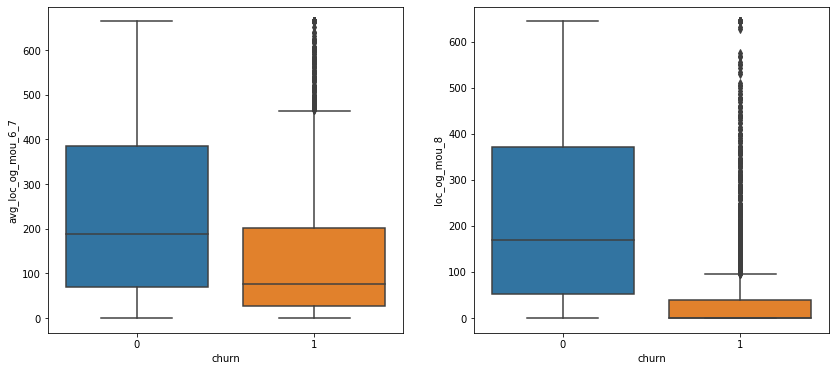

In [69]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.boxplot(x="churn",y="avg_loc_og_mou_6_7", data = churn_data)
plt.subplot(1,2,2)
sns.boxplot(x="churn",y="loc_og_mou_8", data = churn_data)
plt.show()

In [70]:
print(churn_data.groupby("churn").avg_std_ic_t2t_mou_6_7.describe())
print(churn_data.groupby("churn").std_ic_t2t_mou_8.describe())
print(churn_data.groupby("churn").avg_std_ic_t2m_mou_6_7.describe())
print(churn_data.groupby("churn").std_ic_t2m_mou_8.describe())
print(churn_data.groupby("churn").avg_std_ic_t2f_mou_6_7.describe())
print(churn_data.groupby("churn").std_ic_t2f_mou_8.describe())
print(churn_data.groupby("churn").avg_std_ic_mou_6_7.describe())
print(churn_data.groupby("churn").std_ic_mou_8.describe())

         count     mean        std  min    25%    50%     75%      max
churn                                                                 
0      27418.0  7.71017  10.711236  0.0  0.000  2.255  11.580  35.6695
1       2593.0  8.35845  10.688712  0.0  0.065  3.120  14.145  35.6695
         count      mean        std  min  25%   50%   75%    max
churn                                                           
0      27418.0  7.195580  11.092049  0.0  0.0  0.88  9.83  33.13
1       2593.0  2.920764   7.673510  0.0  0.0  0.00  0.36  33.13
         count       mean        std  min    25%    50%      75%      max
churn                                                                    
0      27418.0  19.212977  22.717348  0.0  1.655  9.180  29.9825  74.9825
1       2593.0  18.148360  21.043039  0.0  1.700  9.485  28.3750  74.9825
         count       mean        std  min   25%   50%     75%    max
churn                                                               
0      27418.0  18.316

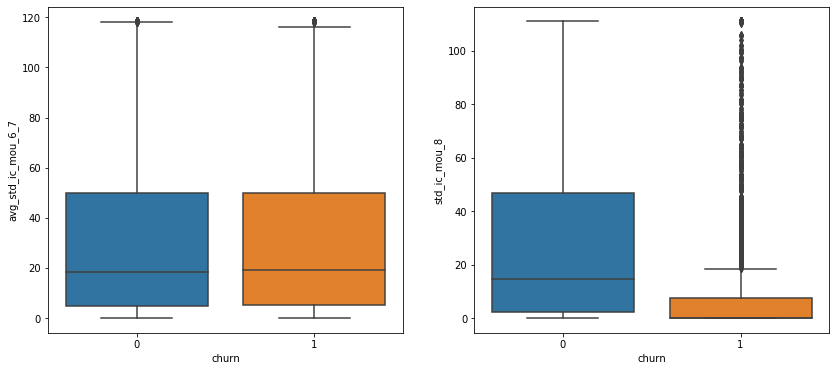

In [71]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.boxplot(x="churn",y="avg_std_ic_mou_6_7", data = churn_data)
plt.subplot(1,2,2)
sns.boxplot(x="churn",y="std_ic_mou_8", data = churn_data)
plt.show()

In [72]:
print(churn_data.groupby("churn").avg_std_og_t2t_mou_6_7.describe())
print(churn_data.groupby("churn").std_og_t2t_mou_8.describe())
print(churn_data.groupby("churn").avg_std_og_t2m_mou_6_7.describe())
print(churn_data.groupby("churn").std_og_t2m_mou_8.describe())
print(churn_data.groupby("churn").avg_std_og_t2f_mou_6_7.describe())
print(churn_data.groupby("churn").std_og_t2f_mou_8.describe())
print(churn_data.groupby("churn").avg_std_og_mou_6_7.describe())
print(churn_data.groupby("churn").std_og_mou_8.describe())

         count        mean         std  min   25%    50%        75%       max
churn                                                                        
0      27418.0  134.859679  206.020849  0.0  0.00  16.49  193.89375  652.3035
1       2593.0  187.477392  225.070116  0.0  1.93  70.90  334.45250  652.3035
         count        mean         std  min  25%    50%     75%      max
churn                                                                   
0      27418.0  120.361525  196.352677  0.0  0.0  8.195  148.31  583.156
1       2593.0   57.675954  142.836321  0.0  0.0  0.000   16.46  583.156
         count        mean         std  min       25%      50%        75%      max
churn                                                                             
0      27418.0  145.025718  195.686015  0.0   3.48625   43.935  222.18375  629.897
1       2593.0  196.898960  215.699586  0.0  10.31000  100.090  333.66400  629.897
         count        mean        std  min  25%    50%       75%

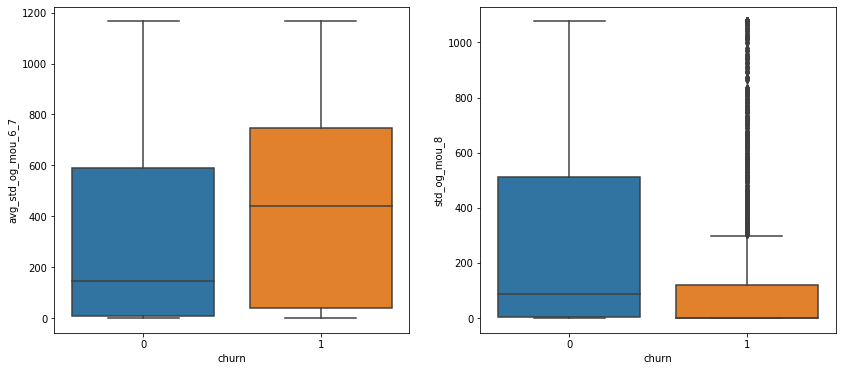

In [73]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.boxplot(x="churn",y="avg_std_og_mou_6_7", data = churn_data)
plt.subplot(1,2,2)
sns.boxplot(x="churn",y="std_og_mou_8", data = churn_data)
plt.show()

In [74]:
print(churn_data.groupby("churn").avg_isd_og_mou_6_7.describe())
print(churn_data.groupby("churn").isd_og_mou_8.describe())
print(churn_data.groupby("churn").avg_isd_ic_mou_6_7.describe())
print(churn_data.groupby("churn").isd_ic_mou_8.describe())

         count  mean  std  min  25%  50%  75%  max
churn                                             
0      27418.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1       2593.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
         count  mean  std  min  25%  50%  75%  max
churn                                             
0      27418.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1       2593.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
         count      mean       std  min  25%  50%    75%      max
churn                                                            
0      27418.0  2.369039  4.979213  0.0  0.0  0.0  0.825  16.9815
1       2593.0  2.325072  4.869278  0.0  0.0  0.0  0.530  16.9815
         count      mean       std  min  25%  50%  75%     max
churn                                                         
0      27418.0  2.356852  5.384729  0.0  0.0  0.0  0.0  16.658
1       2593.0  1.036110  3.709407  0.0  0.0  0.0  0.0  16.658


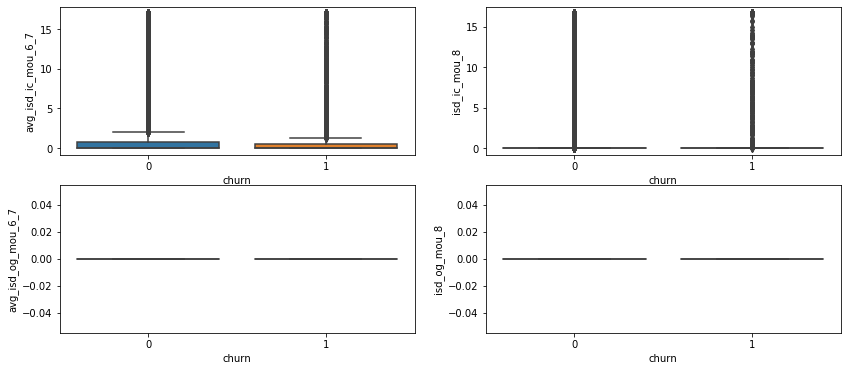

In [75]:
plt.figure(figsize=(14, 6))
plt.subplot(2,2,1)
sns.boxplot(x="churn",y="avg_isd_ic_mou_6_7", data = churn_data)
plt.subplot(2,2,2)
sns.boxplot(x="churn",y="isd_ic_mou_8", data = churn_data)
plt.subplot(2,2,3)
sns.boxplot(x="churn",y="avg_isd_og_mou_6_7", data = churn_data)
plt.subplot(2,2,4)
sns.boxplot(x="churn",y="isd_og_mou_8", data = churn_data)
plt.show()

In [76]:
churn_data.drop(['avg_isd_og_mou_6_7','isd_og_mou_8'],inplace=True,axis=1)
churn_data.drop(['avg_isd_ic_mou_6_7','isd_ic_mou_8'],inplace=True,axis=1)

In [77]:
print(churn_data.groupby("churn").avg_total_ic_mou_6_7.describe())
print(churn_data.groupby("churn").total_ic_mou_8.describe())

         count        mean         std  min       25%       50%       75%      max
churn                                                                             
0      27418.0  273.778860  201.982946  0.0  109.2275  220.3275  404.0075  684.825
1       2593.0  184.785804  174.126474  0.0   55.8850  127.0250  258.5000  684.825
         count        mean         std  min     25%     50%     75%     max
churn                                                                      
0      27418.0  268.250561  208.017454  0.0  98.265  212.36  402.27  663.91
1       2593.0   64.741481  128.662966  0.0   0.000    0.00   70.29  663.91


In [78]:
print(churn_data.groupby("churn").avg_total_og_mou_6_7.describe())
print(churn_data.groupby("churn").total_og_mou_8.describe())

         count        mean         std  min     25%       50%        75%     max
churn                                                                           
0      27418.0  620.697116  399.630422  0.0  312.57  540.5125  866.41375  1476.7
1       2593.0  649.863311  430.633744  0.0  314.30  624.7800  927.04000  1476.7
         count        mean         std  min     25%      50%      75%      max
churn                                                                         
0      27418.0  578.801781  434.580039  0.0  227.97  470.475  866.045  1393.51
1       2593.0  200.612900  353.705984  0.0    0.00    0.000  255.810  1393.51


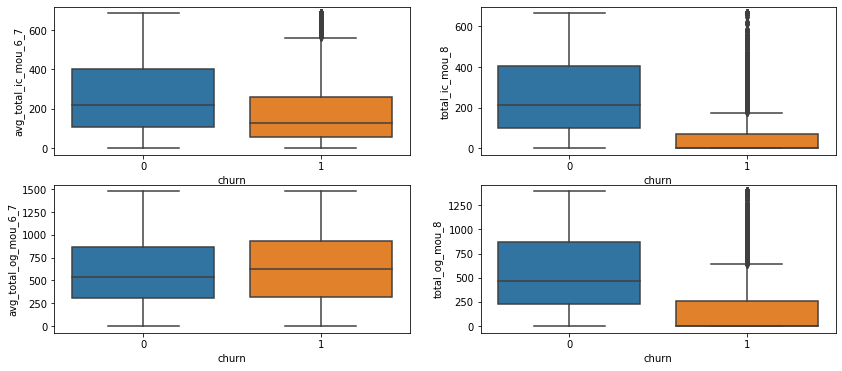

In [79]:
plt.figure(figsize=(14, 6))
plt.subplot(2,2,1)
sns.boxplot(x="churn",y="avg_total_ic_mou_6_7", data = churn_data)
plt.subplot(2,2,2)
sns.boxplot(x="churn",y="total_ic_mou_8", data = churn_data)
plt.subplot(2,2,3)
sns.boxplot(x="churn",y="avg_total_og_mou_6_7", data = churn_data)
plt.subplot(2,2,4)
sns.boxplot(x="churn",y="total_og_mou_8", data = churn_data)
plt.show()

In [80]:
# Dropping roaming mou columns as we already derived roaming user
for col in churn_data.columns:
    if ("roam_" in col):
        churn_data.drop(col, axis=1, inplace=True)

# Dropping std_user column as we already derived std_churn_b
churn_data.drop(['std_user'],inplace=True,axis=1)

#### Check your derived variables

In [81]:
churn_data.describe()

arpu_8   onnet_mou_8  offnet_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  spl_og_mou_8  total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rech_amt_8   vol_2g_mb_8   vol_3g_mb_8   sachet_2g_8  monthly_3g_8      vbc_3g_8         churn  avg_arpu_6_7  avg_onnet_mou_6_7  avg_offnet_mou_6_7  avg_loc_og_t2t_mou_6_7  avg_loc_og_t2m_mou_6_7  avg_loc_og_t2f_mou_6_7  avg_loc_og_mou_6_7  avg_std_og_t2t_mou_6_7  avg_std_og_t2m_mou_6_7  avg_std_og_t2f_mou_6_7  avg_std_og_mou_6_7  avg_spl_og_mou_6_7  avg_total_og_mou_6_7  avg_loc_ic_t2t_mou_6_7  avg_loc_ic_t2m_mou_6_7  avg_loc_ic_t2f_mou_6_7  avg_loc_ic_mou_6_7  avg_std_ic_t2t_mou_6_7  avg_std_ic_t2m_mou_6_7  avg_std_ic_t2f_mou_6_7  avg_std_ic_mou_6_7  \
count  30011.000000  30011.000000  30011.000000      30011.000000      30011.000000      30011.000000  30011.000000      30011.000000      30011.000000      30011.000000  30011.000000  30011.000000    30011.000000      30011.000000      30011.000000      30011.000000  30011.000000      30011.000000      30011.000000      30011.000000  30011.000000    30011.000000      30011.000000      30011.000000    30011.000000         30011.000000  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000       30011.000000        30011.000000            30011.000000            30011.000000            30011.000000        30011.000000            30011.000000            30011.000000            30011.000000        30011.000000        30011.000000          30011.000000            30011.000000            30011.000000            30011.000000        30011.000000            30011.000000            30011.000000            30011.000000        30011.000000   
mean     486.886713    206.120183    317.977065         56.470869        139.639427          3.605732    218.028311        114.945388        122.170686          0.229859    281.560711      4.212541      546.125636         46.023973        127.134757          8.564434    197.522178          6.826229         17.288511          0.626926     29.182576      250.667040          9.115458        555.934591      135.756589            79.733998     23.809384    149.837794      0.316751      0.116124     69.284071      0.086402    542.520516         240.529644          362.215980               61.220199              151.627282                3.943687          237.110501              139.405937              149.507652                0.286508          336.102267            4.084425            623.217124               48.928831              132.448013                9.215919          207.153544                7.766183               19.120992                0.696898           32.536840   
std      277.822261    240.530507    272.696657         65.365354        139.232054          5.773216    210.649621        193.120311        181.960519          0.587567    370.801501      6.230464      441.177504         49.075719        117.742025         12.647212    178.308998         10.905558         23.311477          1.336681     36.243493      210.313019          6.153103        339.556261       77.342268            75.457519     49.726075    308.702178      0.666696      0.320379    145.598521      0.280961    203.421698         247.741092          261.574424               64.267971              135.744884                5.781189          204.963870              208.257067              198.028463                0.620320          377.901638            5.110023            402.479292               47.503630              111.838336               12.620234          170.459278               10.710663               22.579236                1.285262           35.567252   
min        0.000000      0.000000      0.000000          

In [82]:
churn_data_pca = churn_data.copy()
churn_data_pca.shape

(30011, 69)

### Checking the correlation between the features

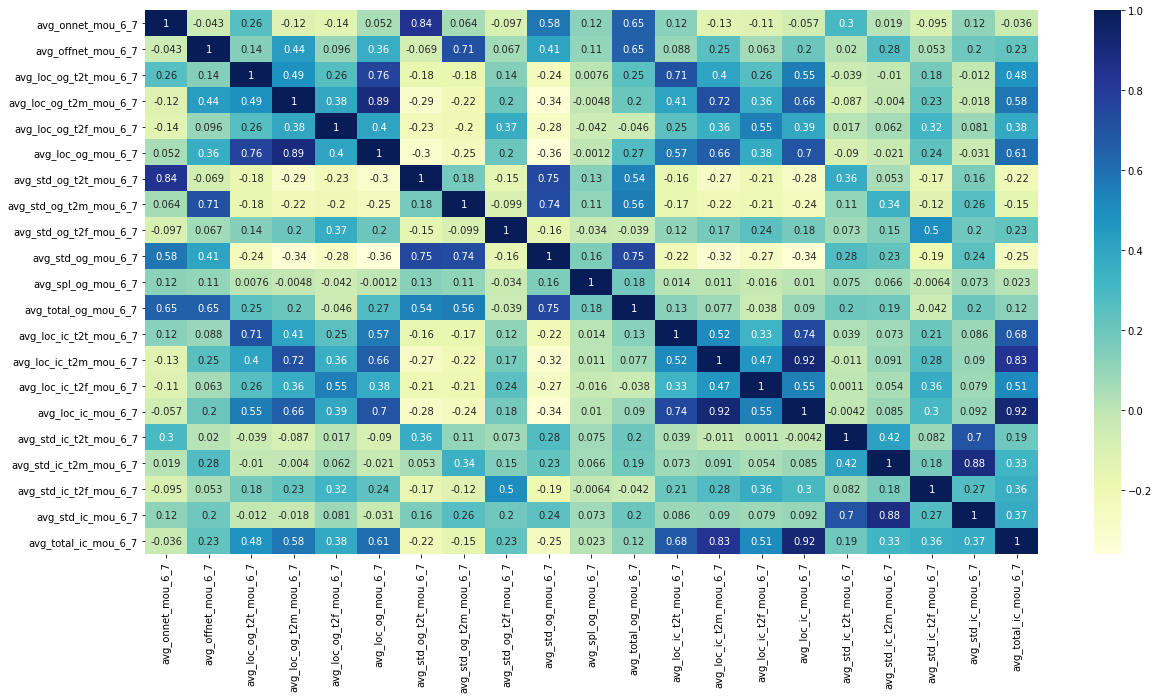

In [83]:
df_mou = pd.DataFrame()
for col in churn_data.columns:
    if ("mou_6_7" in col):
        df_mou[col] = churn_data[col]

plt.figure(figsize=(20,10))
sns.heatmap(df_mou.corr(), annot = True, cmap="YlGnBu")

In [84]:
# Dropping high correlated features
churn_data.drop(['avg_loc_ic_mou_6_7'], axis=1, inplace=True)
churn_data.drop(['avg_loc_og_mou_6_7'], axis=1, inplace=True)
churn_data.drop(['avg_std_ic_mou_6_7'], axis=1, inplace=True)
churn_data.drop(['avg_total_ic_mou_6_7'], axis=1, inplace=True)

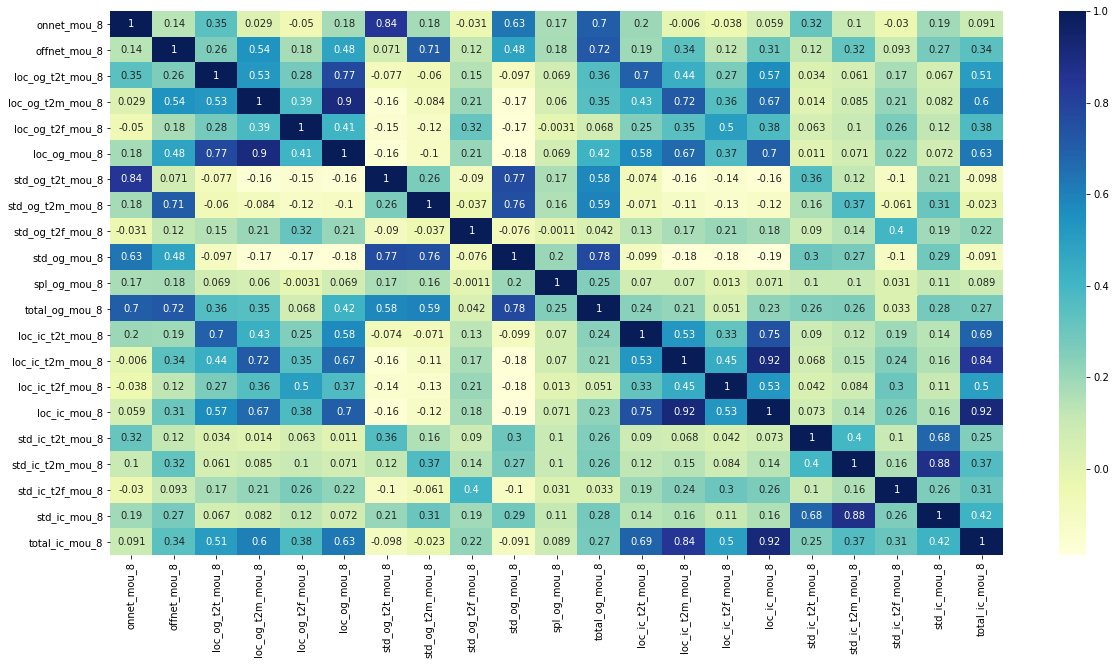

In [85]:
df_mou = pd.DataFrame()
for col in churn_data.columns:
    if ("mou_8" in col):
        df_mou[col] = churn_data[col]

plt.figure(figsize=(20,10))
sns.heatmap(df_mou.corr(), annot = True, cmap="YlGnBu")

In [86]:
# Dropping high correlated features
churn_data.drop(['loc_og_mou_8'], axis=1, inplace=True)
churn_data.drop(['loc_ic_mou_8'], axis=1, inplace=True)
churn_data.drop(['std_ic_mou_8'], axis=1, inplace=True)
churn_data.drop(['total_ic_mou_8'], axis=1, inplace=True)

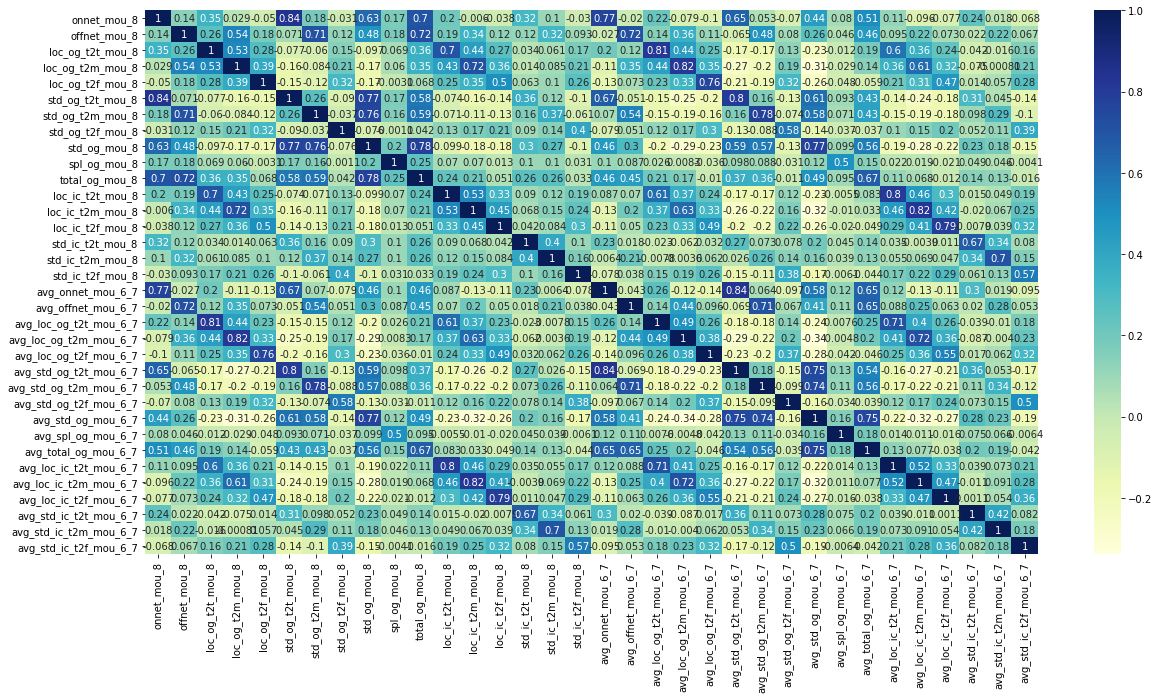

In [87]:
df_mou = pd.DataFrame()
for col in churn_data.columns:
    if ("mou" in col):
        df_mou[col] = churn_data[col]

plt.figure(figsize=(20,10))
sns.heatmap(df_mou.corr(), annot = True, cmap="YlGnBu")

In [88]:
churn_data.drop(['onnet_mou_8'], axis=1, inplace=True)
churn_data.drop(['avg_onnet_mou_6_7'], axis=1, inplace=True)

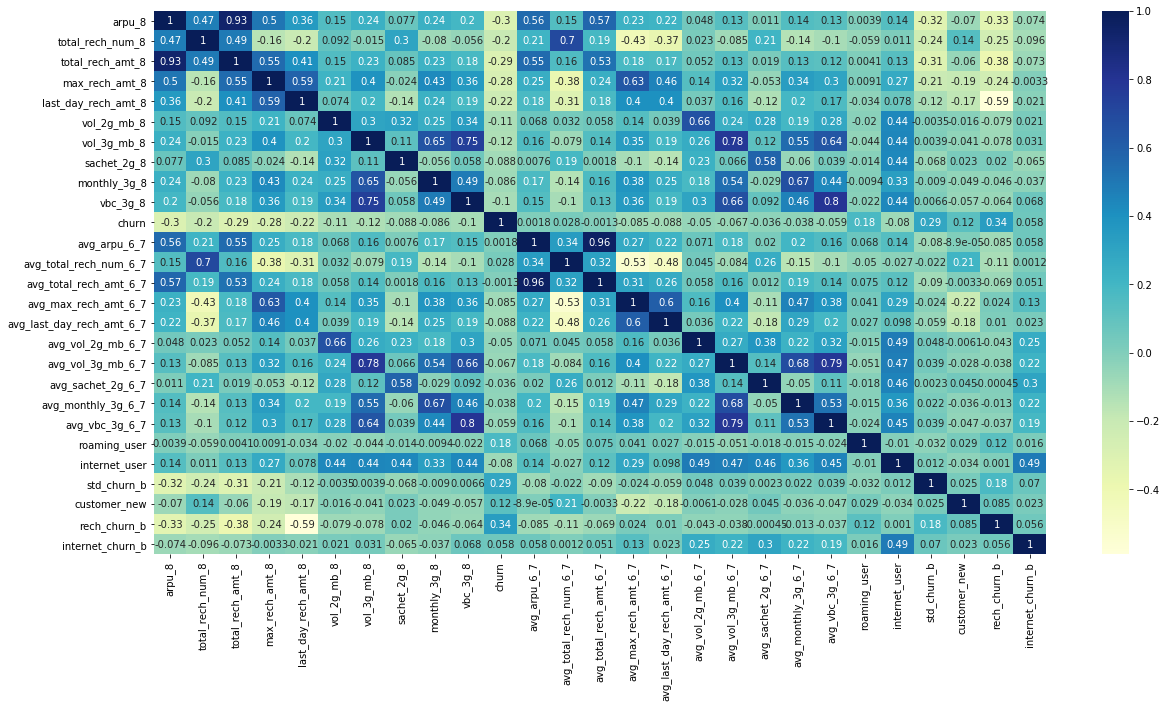

In [89]:
df_others = pd.DataFrame()
for col in churn_data.columns:
    if ("mou" not in col):
        df_others[col] = churn_data[col]

plt.figure(figsize=(20,10))
sns.heatmap(df_others.corr(), annot = True, cmap="YlGnBu")

In [90]:
# Highly Correlated with arpu
churn_data.drop(['total_rech_amt_8'], axis=1, inplace=True)
churn_data.drop(['avg_total_rech_amt_6_7'], axis=1, inplace=True)

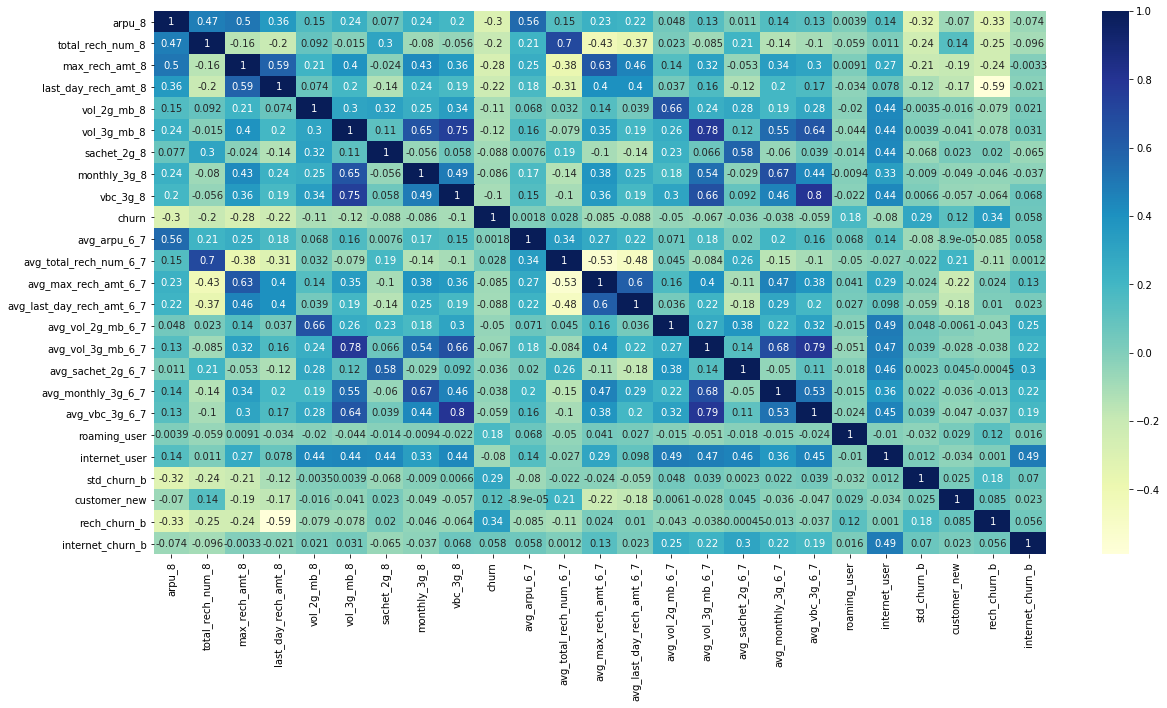

In [91]:
df_others = pd.DataFrame()
for col in churn_data.columns:
    if ("mou" not in col):
        df_others[col] = churn_data[col]

plt.figure(figsize=(20,10))
sns.heatmap(df_others.corr(), annot = True, cmap="YlGnBu")

## Data Modeling

Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

### Splitting Data into Training and Test Sets

In [92]:
print(churn_data.shape)

(30011, 57)


In [93]:
churn_data.head()

arpu_8  offnet_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  spl_og_mou_8  total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  total_rech_num_8  max_rech_amt_8  last_day_rech_amt_8  vol_2g_mb_8  vol_3g_mb_8  sachet_2g_8  monthly_3g_8  vbc_3g_8  churn  avg_arpu_6_7  avg_offnet_mou_6_7  avg_loc_og_t2t_mou_6_7  avg_loc_og_t2m_mou_6_7  avg_loc_og_t2f_mou_6_7  avg_std_og_t2t_mou_6_7  avg_std_og_t2m_mou_6_7  avg_std_og_t2f_mou_6_7  avg_std_og_mou_6_7  avg_spl_og_mou_6_7  avg_total_og_mou_6_7  avg_loc_ic_t2t_mou_6_7  avg_loc_ic_t2m_mou_6_7  avg_loc_ic_t2f_mou_6_7  avg_std_ic_t2t_mou_6_7  avg_std_ic_t2m_mou_6_7  avg_std_ic_t2f_mou_6_7  avg_total_rech_num_6_7  avg_max_rech_amt_6_7  avg_last_day_rech_amt_6_7  avg_vol_2g_mb_6_7  avg_vol_3g_mb_6_7  avg_sachet_2g_6_7  avg_monthly_3g_6_7  avg_vbc_3g_6_7  roaming_user  internet_user  \
7   985.202        325.91             40.28            162.28             17.36             12.01             49.14              1.88         77.84          6.50          350.16             27.31            121.19            38.456             30.39             70.79              4.16                 7             252                  225         0.00         0.00            0             0     57.74      1      994.8280             510.295                  41.385                374.1985                  18.694                  13.795                  40.825                  2.2565              68.000                2.25               548.385                  45.200                 219.525                  40.591                 23.4330                 74.9825                   4.541                     5.0                 298.5                        0.0              0.000              0.000                0.0                 0.0          19.060             1              1   
8   137.362        136.48             12.49             50.54              0.00             22.58             75.69              0.00         98.28         10.23          171.56              0.31             15.48             0.000              0.10              0.65              0.00                14              30                   10         0.03        11.94            2             0     21.03      0      435.4720              87.645                 209.387                 75.7700                   0.000                 124.995                  11.865                  0.0000             136.870                0.00               470.010                  16.840                  35.780                   0.000                  0.2900                 13.2550                   0.000                    20.0                 122.0                       25.0             97.215            375.475                0.5                 0.0         288.495             0              1   
13  593.260        482.46             36.01            294.46             17.36            498.23            156.94              0.00        655.18          4.78         1015.26             52.58            195.18             7.490             33.13             70.79              1.91                11             130                    0         0.02         0.00            2             0      0.00      0      349.2585             266.295                  27.910                 99.2050                   2.270                 266.195                 154.150                  0.0000             420.355                0.00               549.750                  37.730                  80.705                   2.405                 35.6695                 51.9000                   0.000                     5.0                 110.0                       80.0              0.000              0.000                0.0                 0.0           0.000             1              1   
16  187.894        162.76        

In [94]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = churn_data.drop(['churn'],axis=1)

# Putting response variable to y
y = churn_data['churn']

y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int32

In [95]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100,stratify=y)

### Normalize the dataset

In [96]:
scaler = StandardScaler()

category_cols = ['roaming_user','customer_new','internet_user','internet_churn_b','std_churn_b','rech_churn_b']  

X_train_category = X_train[category_cols]
X_train = X_train.drop(category_cols,axis=1)

X_test_category = X_test[category_cols]
X_test = X_test.drop(category_cols,axis=1)

numeric_cols = X_train.columns

# Apply fit_transform on train data
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Apply transform on test data
X_test[numeric_cols]  = scaler.transform(X_test[numeric_cols])

# Concatenate numerical transformed data and categorical data columns
X_train = pd.concat([X_train_category, X_train], axis=1)
X_test = pd.concat([X_test_category, X_test], axis=1)

print(X_train.shape)
print(X_test.shape)

(21007, 56)
(9004, 56)


In [97]:
X_test.head()

roaming_user  customer_new  internet_user  internet_churn_b  std_churn_b  rech_churn_b    arpu_8  offnet_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  spl_og_mou_8  total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  total_rech_num_8  max_rech_amt_8  last_day_rech_amt_8  vol_2g_mb_8  vol_3g_mb_8  sachet_2g_8  monthly_3g_8  vbc_3g_8  avg_arpu_6_7  avg_offnet_mou_6_7  avg_loc_og_t2t_mou_6_7  avg_loc_og_t2m_mou_6_7  avg_loc_og_t2f_mou_6_7  avg_std_og_t2t_mou_6_7  avg_std_og_t2m_mou_6_7  avg_std_og_t2f_mou_6_7  avg_std_og_mou_6_7  avg_spl_og_mou_6_7  avg_total_og_mou_6_7  avg_loc_ic_t2t_mou_6_7  avg_loc_ic_t2m_mou_6_7  avg_loc_ic_t2f_mou_6_7  avg_std_ic_t2t_mou_6_7  avg_std_ic_t2m_mou_6_7  avg_std_ic_t2f_mou_6_7  avg_total_rech_num_6_7  avg_max_rech_amt_6_7  avg_last_day_rech_amt_6_7  avg_vol_2g_mb_6_7  avg_vol_3g_mb_6_7  \
50179             0             1              0                 0            0             0 -1.261276     -0.814172         -0.740707         -0.793265         -0.626071          0.181732         -0.344336         -0.389632     -0.193967      1.648829       -0.644855         -0.822434         -1.016667         -0.678421          2.416383         -0.599757         -0.470766         -0.990433       -0.077201            -0.398957    -0.478370    -0.486351    -0.475458     -0.364611 -0.476375     -0.365454           -0.149919               -0.858131               -0.870576               -0.682347                2.286908                0.641078               -0.460130            1.573762            2.665610              0.913975               -0.913440               -1.094250                0.841603                1.195073               -0.617815                2.979948               -0.419690             -0.379314                  -0.086795          -0.529809          -0.516463   
20587             1             0              0                 0            0             0  0.145354      0.343861          1.587540          1.813785         -0.393069         -0.539891         -0.588457          2.820738     -0.683857      0.762021        0.101863          1.293615          1.196577         -0.507922         -0.006032          0.203765          1.662597          1.282332       -0.077201             0.659366    -0.478370    -0.486351    -0.475458     -0.364611 -0.476375      0.342628            0.293670                2.312027                1.859779                0.884418               -0.372323               -0.686473               -0.460130           -0.688654           -0.184426              0.376984                2.283988                1.072494               -0.248510                0.062285               -0.182872               -0.542007                1.879941             -0.449158                  -0.247371          -0.529809          -0.516463   
51116             1             0              1                 1            0             0  1.696288      0.689302          2.215657          2.042868         -0.365453         -0.574427         -0.461505         -0.389632     -0.644526     -0.502322        0.825518          2.156450          2.031990          0.298789         -0.624716         -0.722023         -0.261905         -0.178731        0.233467            -0.398957     2.615472     1.772432    -0.475458     -0.364611  2.546001      2.233205            1.471490                2.312027                2.110205                0.411367               -0.663290               -0.229029               -0.411826           -0.608601            1.370585              1.184873                2.283988                0.943804                1.182185               -0.081989                0.871616                0.470138                0.376336              0.451824                   0.828489           1.916122           1.601208   
70628             0            

### Common functions for all models

In [98]:
def df_predictions(y, y_pred, prob_boundary):
    y_df = pd.DataFrame(y)
    y_df['CustID'] = y_df.index

    y_pred_df = pd.DataFrame(y_pred)

    # Removing index for both dataframes to append them side by side 
    y_df.reset_index(drop=True, inplace=True)
    y_pred_df.reset_index(drop=True, inplace=True)

    y_pred_final = pd.concat([y_df,y_pred_df],axis=1)

    # Renaming the column
    y_pred_final= y_pred_final.rename(columns={ 0 : 'churn_Prob'})

    # Rearranging the columns
    #y_pred_final = y_pred_final.reindex_axis(['CustID','churn','churn_Prob'], axis=1)

    # Creating new column 'predicted' with 1 if churn_Prob>prob_boundary else 0
    y_pred_final['churn_predicted'] = y_pred_final.churn_Prob.map( lambda x: 1 if x >prob_boundary else 0)
   
    return y_pred_final

In [99]:
def model_eval(y_pred_final):
    # Confusion matrix 
    confusion = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.churn_predicted)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print("Confusion Matrix -> ")
    print("# Predicted","\t","notchurn","\t","churn")
    print("# Actual")
    print("# not_churn\t",confusion[0,0],"\t\t",confusion[0,1])        
    print("# churn\t\t",confusion[1,0],"\t\t",confusion[1,1])
    # Let's check the report of our model
    print("\nClassification Report -> ")
    print(classification_report(y_pred_final.churn, y_pred_final.churn_predicted))    
    print("\nSensitivity (True Positive rate OR Recall of Churn Label) -> ")
    print(round(TP / (TP+FN),2))
    print("\nSpecificity (True Negative rate OR Recall of Non Churn Label) -> ")
    print(round(TN / (TN+FP),2))
    auc_score = metrics.roc_auc_score( y_pred_final.churn, y_pred_final.churn_Prob)
    print("\nAUC Score -> ", auc_score)    

In [100]:
#Draws the ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [101]:
def plot_cutoff_df(y_train_pred_final):
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        y_train_pred_final[i]= y_train_pred_final.churn_Prob.map(lambda x: 1 if x > i else 0)
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives

    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1    
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)

    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [102]:
#Prints VIF of all the features
def calculateVif(x_train_sm): 
    vif = pd.DataFrame()
    vif['Features'] = x_train_sm.columns
    vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [103]:
#returns the stats metric
def getLogisticRegStatSummary():
    logm2 = sm.GLM(y_train,A_train_sm, family = sm.families.Binomial())
    res = logm2.fit()
    print(res.summary())
    calculateVif(X_train_sm)
    return res

### Data Modeling using Logistic Regression without PCA

In [104]:
#Initialising the model
logreg = LogisticRegression(class_weight='balanced')

In [105]:
rfe = RFE(logreg, 12)
rfe = rfe.fit(X_train, y_train)

In [106]:
col = X_train.columns[rfe.support_]

In [107]:
## Building the model in bottom backward approach
#X_train_sm = sm.add_constant(X_train[col])
X_train_sm = (X_train[col])
X_train_sm.shape

(21007, 12)

In [108]:
#res = getLogisticRegStatSummary(X_train_sm)
res = logreg.fit(X_train_sm,y_train)
calculateVif(X_train_sm)

            Features   VIF
2      internet_user  3.29
6   loc_og_t2m_mou_8  2.32
8   loc_ic_t2m_mou_8  2.14
3   internet_churn_b  1.89
1       customer_new  1.80
7     total_og_mou_8  1.60
0       roaming_user  1.52
5       rech_churn_b  1.44
4        std_churn_b  1.38
10       vol_3g_mb_8  1.35
9        vol_2g_mb_8  1.28
11      avg_arpu_6_7  1.28


In [109]:
#Lets drop the column with highest VIF
X_train_sm.drop("internet_user", axis=1, inplace=True)
#res = getLogisticRegStatSummary(X_train_sm)
res = logreg.fit(X_train_sm,y_train)
calculateVif(X_train_sm)

            Features   VIF
5   loc_og_t2m_mou_8  2.31
7   loc_ic_t2m_mou_8  2.12
1       customer_new  1.60
6     total_og_mou_8  1.60
0       roaming_user  1.42
4       rech_churn_b  1.41
3        std_churn_b  1.36
10      avg_arpu_6_7  1.28
2   internet_churn_b  1.24
9        vol_3g_mb_8  1.17
8        vol_2g_mb_8  1.11


In [110]:
#Lets drop the column with highest VIF
X_train_sm.drop("loc_og_t2m_mou_8", axis=1, inplace=True)
#res = getLogisticRegStatSummary(X_train_sm)
res = logreg.fit(X_train_sm,y_train)
calculateVif(X_train_sm)

           Features   VIF
1      customer_new  1.58
5    total_og_mou_8  1.49
0      roaming_user  1.42
4      rech_churn_b  1.41
3       std_churn_b  1.35
9      avg_arpu_6_7  1.27
2  internet_churn_b  1.24
8       vol_3g_mb_8  1.17
6  loc_ic_t2m_mou_8  1.12
7       vol_2g_mb_8  1.11


In [111]:
#Co-efficients of the attributes.
pd_coefficients = pd.concat([pd.DataFrame(X_train_sm.columns), pd.DataFrame(np.transpose(logreg.coef_))], axis=1)
pd_coefficients.columns = ["Feature", "Co-efficient"]
pd_coefficients

Feature  Co-efficient
0      roaming_user      1.045993
1      customer_new      0.584114
2  internet_churn_b      0.182142
3       std_churn_b      0.787632
4      rech_churn_b      1.404129
5    total_og_mou_8     -0.648218
6  loc_ic_t2m_mou_8     -0.809716
7       vol_2g_mb_8     -0.431907
8       vol_3g_mb_8     -0.588248
9      avg_arpu_6_7      0.463891

##### Model Evaluation for Logistic Regression on Train Data

In [112]:
##Lets stop converging since both p-value and vif are in acceptable range
#y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred = res.predict_proba(X_train_sm)[:,1]
y_train_pred[:10]

array([0.48700225, 0.19069843, 0.1235558 , 0.13014674, 0.27857392,
       0.10184387, 0.34318724, 0.41933544, 0.14967135, 0.29323019])

   churn  CustID  churn_Prob  churn_predicted
0      0   76985    0.487002                0
1      0   77814    0.190698                0
2      0   24787    0.123556                0
3      0   60192    0.130147                0
4      0   69896    0.278574                0
    churn  CustID  churn_Prob  churn_predicted
7       1   70529    0.419335                0
47      1   77789    0.755256                1
52      1   34851    0.952699                1
55      1   54516    0.413756                0
58      1    1802    0.955845                1


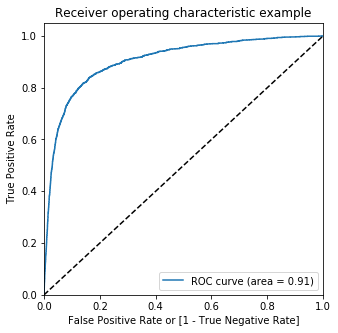

In [113]:
y_train_pred_final = df_predictions(y_train, y_train_pred, 0.5)

# Let's see the head
print(y_train_pred_final[y_train_pred_final['churn']==0].head())
print(y_train_pred_final[y_train_pred_final['churn']==1].head())

draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_Prob)

     prob  accuracy     sensi     speci
0.0   0.0  0.086400  1.000000  0.000000
0.1   0.1  0.418718  0.972452  0.366351
0.2   0.2  0.608702  0.941047  0.577272
0.3   0.3  0.726139  0.907438  0.708993
0.4   0.4  0.795306  0.868320  0.788401
0.5   0.5  0.843624  0.828099  0.845092
0.6   0.6  0.881230  0.777961  0.890996
0.7   0.7  0.906555  0.711846  0.924969
0.8   0.8  0.924311  0.618733  0.953210
0.9   0.9  0.929595  0.412121  0.978533


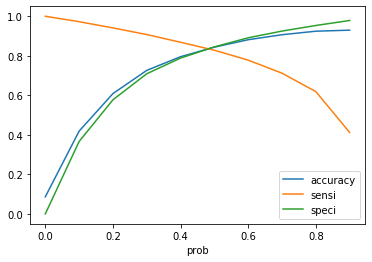

In [114]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plot_cutoff_df(y_train_pred_final)

##### Based upon above graph; decide the probability cutoff for churn label

In [115]:
final_cutoff = 0.45
y_train_pred_final['churn_predicted'] = y_train_pred_final.churn_Prob.map( lambda x: 1 if x > final_cutoff else 0)
y_train_pred_final.head()

churn  CustID  churn_Prob  churn_predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0   76985    0.487002                1    1    1    1    1    1    0    0    0    0    0
1      0   77814    0.190698                0    1    1    0    0    0    0    0    0    0    0
2      0   24787    0.123556                0    1    1    0    0    0    0    0    0    0    0
3      0   60192    0.130147                0    1    1    0    0    0    0    0    0    0    0
4      0   69896    0.278574                0    1    1    1    0    0    0    0    0    0    0

In [116]:
model_eval(y_train_pred_final)

Confusion Matrix -> 
# Predicted 	 notchurn 	 churn
# Actual
# not_churn	 15710 		 3482
# churn		 269 		 1546

Classification Report -> 
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     19192
           1       0.31      0.85      0.45      1815

    accuracy                           0.82     21007
   macro avg       0.65      0.84      0.67     21007
weighted avg       0.92      0.82      0.86     21007


Sensitivity (True Positive rate OR Recall of Churn Label) -> 
0.85

Specificity (True Negative rate OR Recall of Non Churn Label) -> 
0.82

AUC Score ->  0.9051093373386754


##### Model Evaluation for Logistic Regression on Test Data

In [117]:
X_train_sm.columns

Index(['roaming_user', 'customer_new', 'internet_churn_b', 'std_churn_b', 'rech_churn_b', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'avg_arpu_6_7'], dtype='object')

In [118]:
#Predicting on test data 
#X_test_sm = sm.add_constant(X_test)
X_test_sm = X_test[X_train_sm.columns]
#y_test_pred = res.predict(X_test).values.reshape(-1)
y_test_pred = res.predict_proba(X_test_sm)[:,1]
y_test_pred

array([0.38834176, 0.12564014, 0.0090903 , ..., 0.07016141, 0.38279319,
       0.0490749 ])

In [119]:
y_test_pred_final = df_predictions(y_test, y_test_pred, final_cutoff)

# Let's see the head
print(y_test_pred_final[y_test_pred_final['churn']==0].head())
print(y_test_pred_final[y_test_pred_final['churn']==1].head())

   churn  CustID  churn_Prob  churn_predicted
0      0   50179    0.388342                0
1      0   20587    0.125640                0
2      0   51116    0.009090                0
3      0   70628    0.065628                0
4      0   75091    0.651222                1
    churn  CustID  churn_Prob  churn_predicted
7       1   39792    0.468974                1
20      1   63461    0.915321                1
34      1   69509    0.941625                1
52      1   43937    0.844128                1
65      1   24083    0.218549                0


In [120]:
model_eval(y_test_pred_final)

Confusion Matrix -> 
# Predicted 	 notchurn 	 churn
# Actual
# not_churn	 6734 		 1492
# churn		 120 		 658

Classification Report -> 
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8226
           1       0.31      0.85      0.45       778

    accuracy                           0.82      9004
   macro avg       0.64      0.83      0.67      9004
weighted avg       0.92      0.82      0.85      9004


Sensitivity (True Positive rate OR Recall of Churn Label) -> 
0.85

Specificity (True Negative rate OR Recall of Non Churn Label) -> 
0.82

AUC Score ->  0.9036705361456591


### Data Modeling using PCA

In [121]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

In [122]:
# create folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

Logistic_grid = GridSearchCV(
    Pipeline([
        ('reduce_dim', PCA()),
        ('classify', LogisticRegression(class_weight='balanced'))
        ]),
    param_grid=[
        {
            'reduce_dim__n_components': range(20,40,4),
            'classify__C': np.logspace(-4, 4, 4)
        }
    ],
    cv=folds, scoring='roc_auc')

In [123]:
Logistic_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('reduce_dim',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('classify',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           interc...
                                       

In [124]:
print("PCA ",Logistic_grid.best_estimator_.named_steps['classify'])
print("\nBest params ",Logistic_grid.best_params_)
print("\nBest score (CV score=%0.3f):" % Logistic_grid.best_score_)

PCA  LogisticRegression(C=0.046415888336127774, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Best params  {'classify__C': 0.046415888336127774, 'reduce_dim__n_components': 36}

Best score (CV score=0.904):


#### Making a scree plot for the explained variance and components

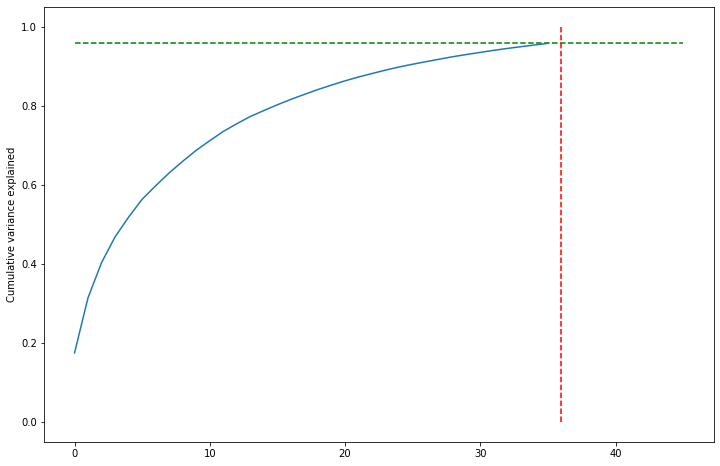

In [125]:
var_cumu = np.cumsum(Logistic_grid.best_estimator_.named_steps['reduce_dim'].explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=36, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.96, xmax=45, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Based upon above scree plot, consider "n" PCA components

In [126]:
pca = IncrementalPCA(n_components=36)
df_train_pca = pca.fit_transform(X_train)
df_test_pca = pca.transform(X_test)

In [127]:
print(df_train_pca.shape)
print(df_test_pca.shape)
print(pca.components_)
pca.explained_variance_ratio_

(21007, 36)
(9004, 36)
[[ 0.02081462  0.05697428 -0.06133042 ... -0.00075234 -0.13906688
  -0.15862951]
 [ 0.00341386 -0.00338708 -0.01958324 ... -0.00231242 -0.06583814
  -0.07068564]
 [ 0.02842736  0.03155971  0.09796496 ...  0.06320719  0.27629352
   0.27901779]
 ...
 [-0.5048512   0.5780275   0.05638966 ...  0.03838805  0.01598162
  -0.15579612]
 [-0.16647059  0.46974111 -0.00169583 ... -0.01287312 -0.08478941
   0.1534247 ]
 [-0.30894838 -0.12448551 -0.0853869  ... -0.04509173 -0.39078827
   0.39343875]]


array([0.17474345, 0.13976626, 0.08880792, 0.06512469, 0.04995166,
       0.04505457, 0.03420209, 0.03252679, 0.02942012, 0.02777556,
       0.02430262, 0.02337519, 0.0194984 , 0.01832303, 0.01501125,
       0.0146061 , 0.013674  , 0.01263429, 0.01229965, 0.01116216,
       0.01075769, 0.00975584, 0.00877201, 0.00862101, 0.00791556,
       0.006919  , 0.00649734, 0.00641169, 0.00619724, 0.00542921,
       0.00525602, 0.00517552, 0.00474145, 0.00414689, 0.0040398 ,
       0.00395324])

(36, 36)


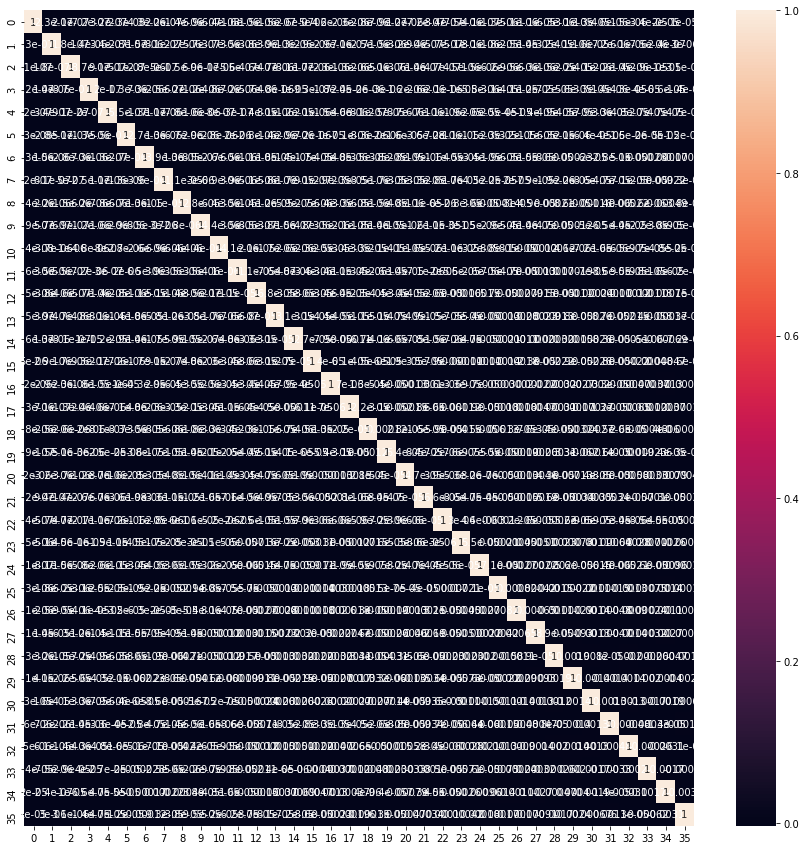

In [128]:
corrmat = np.corrcoef(df_train_pca.transpose())
print(corrmat.shape)
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

#### Apply Logistic Regression on PCA components

In [129]:
learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca, y_train)

##### Model Evaluation for Logistic Regression on Train Data

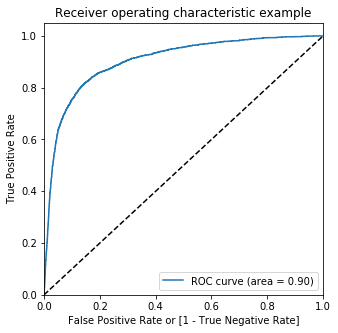

In [130]:
y_train_pred = model_pca.predict_proba(df_train_pca)[:,1]

y_train_pred_final = df_predictions(y_train, y_train_pred, 0.5)

draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_Prob)

     prob  accuracy     sensi     speci
0.0   0.0  0.086400  1.000000  0.000000
0.1   0.1  0.423716  0.975758  0.371509
0.2   0.2  0.601609  0.943251  0.569300
0.3   0.3  0.716142  0.907438  0.698051
0.4   0.4  0.792593  0.864463  0.785796
0.5   0.5  0.844385  0.823691  0.846342
0.6   0.6  0.877422  0.776309  0.886984
0.7   0.7  0.903937  0.712397  0.922051
0.8   0.8  0.922978  0.631956  0.950500
0.9   0.9  0.928119  0.414325  0.976709


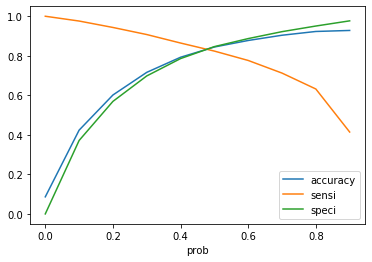

In [131]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plot_cutoff_df(y_train_pred_final)

##### Based upon above graph; decide the probability cutoff for churn label

In [132]:
final_cutoff = 0.45
y_train_pred_final['churn_predicted'] = y_train_pred_final.churn_Prob.map( lambda x: 1 if x > final_cutoff else 0)
# Let's see the head
print(y_train_pred_final[y_train_pred_final['churn']==0].head())
print(y_train_pred_final[y_train_pred_final['churn']==1].head())

   churn  CustID  churn_Prob  churn_predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0   76985    0.547555                1    1    1    1    1    1    1    0    0    0    0
1      0   77814    0.165050                0    1    1    0    0    0    0    0    0    0    0
2      0   24787    0.103424                0    1    1    0    0    0    0    0    0    0    0
3      0   60192    0.163592                0    1    1    0    0    0    0    0    0    0    0
4      0   69896    0.148804                0    1    1    0    0    0    0    0    0    0    0
    churn  CustID  churn_Prob  churn_predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
7       1   70529    0.468564                1    1    1    1    1    1    0    0    0    0    0
47      1   77789    0.908725                1    1    1    1    1    1    1    1    1    1    1
52      1   34851    0.912162                1    1    1    1    1    1    1    1    1    1    1
55      1   54516    0.679347       

In [133]:
model_eval(y_train_pred_final)

Confusion Matrix -> 
# Predicted 	 notchurn 	 churn
# Actual
# not_churn	 15730 		 3462
# churn		 280 		 1535

Classification Report -> 
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     19192
           1       0.31      0.85      0.45      1815

    accuracy                           0.82     21007
   macro avg       0.64      0.83      0.67     21007
weighted avg       0.92      0.82      0.86     21007


Sensitivity (True Positive rate OR Recall of Churn Label) -> 
0.85

Specificity (True Negative rate OR Recall of Non Churn Label) -> 
0.82

AUC Score ->  0.9037935055584454


##### Model Evaluation for PCA+Logistic Regression on Test Data

In [134]:
y_test_pred = model_pca.predict_proba(df_test_pca)[:,1]
y_test_pred

array([0.66519254, 0.03348692, 0.0761717 , ..., 0.02461011, 0.1277654 ,
       0.03334114])

In [135]:
"{:2.2}".format(metrics.roc_auc_score(y_test, y_test_pred))

'0.9'

In [136]:
y_test_pred_final = df_predictions(y_test, y_test_pred, final_cutoff)

# Let's see the head
print(y_test_pred_final[y_test_pred_final['churn']==0].head())
print(y_test_pred_final[y_test_pred_final['churn']==1].head())

   churn  CustID  churn_Prob  churn_predicted
0      0   50179    0.665193                1
1      0   20587    0.033487                0
2      0   51116    0.076172                0
3      0   70628    0.040143                0
4      0   75091    0.334333                0
    churn  CustID  churn_Prob  churn_predicted
7       1   39792    0.674685                1
20      1   63461    0.971257                1
34      1   69509    0.976697                1
52      1   43937    0.850203                1
65      1   24083    0.031193                0


In [137]:
model_eval(y_test_pred_final)

Confusion Matrix -> 
# Predicted 	 notchurn 	 churn
# Actual
# not_churn	 6753 		 1473
# churn		 125 		 653

Classification Report -> 
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8226
           1       0.31      0.84      0.45       778

    accuracy                           0.82      9004
   macro avg       0.64      0.83      0.67      9004
weighted avg       0.92      0.82      0.86      9004


Sensitivity (True Positive rate OR Recall of Churn Label) -> 
0.84

Specificity (True Negative rate OR Recall of Non Churn Label) -> 
0.82

AUC Score ->  0.8970600459887358


#### Apply Random Forest on PCA components

In [138]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
#from imblearn.ensemble import BalancedRandomForestClassifier

In [139]:
# create folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

rf_grid = GridSearchCV(
    Pipeline([
        ('reduce_dim', PCA()),
        ('classify', RandomForestClassifier(class_weight='balanced_subsample'))
        ]),
    param_grid=[
        {
            'reduce_dim__n_components': range(20,40,4),
            'classify__max_depth': [6,8],
            'classify__min_samples_leaf': range(200,400,100),
            'classify__min_samples_split': range(300,500,100),
            'classify__n_estimators': [10,20,30],
            'classify__criterion':["gini","entropy"]
        }
    ],
    cv=folds, scoring='roc_auc')

In [140]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('reduce_dim',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('classify',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight='balanced_subsample'...
             iid='deprecated', n_jobs=None,
             param_grid=[{'classify__criterion': ['gini', 'entropy'],
                          'classify__

In [141]:
print("PCA ",rf_grid.best_estimator_.named_steps['classify'])
print("\n",rf_grid.best_params_)
print("\nBest parameter (CV score=%0.3f):" % rf_grid.best_score_)

PCA  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=200,
                       min_samples_split=400, min_weight_fraction_leaf=0.0,
                       n_estimators=30, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

 {'classify__criterion': 'entropy', 'classify__max_depth': 8, 'classify__min_samples_leaf': 200, 'classify__min_samples_split': 400, 'classify__n_estimators': 30, 'reduce_dim__n_components': 36}

Best parameter (CV score=0.893):


##### Fitting the final model with the best parameters obtained from grid search.

In [142]:
pca = IncrementalPCA(n_components=36)
df_train_pca = pca.fit_transform(X_train)
df_test_pca = pca.transform(X_test)

In [171]:
rfc = RandomForestClassifier(bootstrap=True,
                             class_weight='balanced_subsample',
                             max_depth=6,
                             criterion='gini',
                             min_samples_leaf=200, 
                             min_samples_split=400,
                             n_estimators=30)

In [172]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=200,
                       min_samples_split=400, min_weight_fraction_leaf=0.0,
                       n_estimators=30, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

##### Model Evaluation for PCA+Random Forest on Train Data

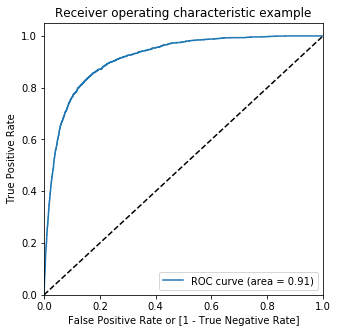

In [173]:
y_train_pred = rfc.predict_proba(df_train_pca)[:,1]

y_train_pred_final = df_predictions(y_train, y_train_pred, 0.5)

draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_Prob)

     prob  accuracy     sensi     speci
0.0   0.0  0.086400  1.000000  0.000000
0.1   0.1  0.101680  1.000000  0.016726
0.2   0.2  0.356405  0.993388  0.296165
0.3   0.3  0.628314  0.955923  0.597332
0.4   0.4  0.805827  0.871625  0.799604
0.5   0.5  0.882658  0.776309  0.892716
0.6   0.6  0.912696  0.668871  0.935754
0.7   0.7  0.924501  0.554270  0.959514
0.8   0.8  0.927358  0.400000  0.977230
0.9   0.9  0.915124  0.023140  0.999479


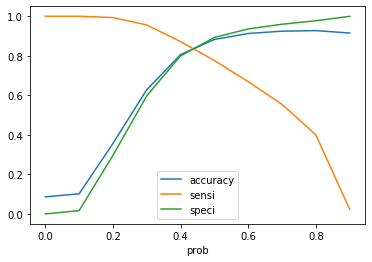

In [174]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plot_cutoff_df(y_train_pred_final)

##### Based upon above graph; decide the probability cutoff for churn label

In [175]:
final_cutoff = 0.4
y_train_pred_final['churn_predicted'] = y_train_pred_final.churn_Prob.map( lambda x: 1 if x > final_cutoff else 0)
# Let's see the head
print(y_train_pred_final[y_train_pred_final['churn']==0].head())
print(y_train_pred_final[y_train_pred_final['churn']==1].head())

   churn  CustID  churn_Prob  churn_predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0   76985    0.518146                1    1    1    1    1    1    1    0    0    0    0
1      0   77814    0.574324                1    1    1    1    1    1    1    0    0    0    0
2      0   24787    0.175590                0    1    1    0    0    0    0    0    0    0    0
3      0   60192    0.438395                1    1    1    1    1    1    0    0    0    0    0
4      0   69896    0.264430                0    1    1    1    0    0    0    0    0    0    0
    churn  CustID  churn_Prob  churn_predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
7       1   70529    0.421590                1    1    1    1    1    1    0    0    0    0    0
47      1   77789    0.641540                1    1    1    1    1    1    1    1    0    0    0
52      1   34851    0.894980                1    1    1    1    1    1    1    1    1    1    0
55      1   54516    0.432428       

In [176]:
model_eval(y_train_pred_final)

Confusion Matrix -> 
# Predicted 	 notchurn 	 churn
# Actual
# not_churn	 15346 		 3846
# churn		 233 		 1582

Classification Report -> 
              precision    recall  f1-score   support

           0       0.99      0.80      0.88     19192
           1       0.29      0.87      0.44      1815

    accuracy                           0.81     21007
   macro avg       0.64      0.84      0.66     21007
weighted avg       0.93      0.81      0.84     21007


Sensitivity (True Positive rate OR Recall of Churn Label) -> 
0.87

Specificity (True Negative rate OR Recall of Non Churn Label) -> 
0.8

AUC Score ->  0.9148919372971059


##### Model Evaluation for PCA+Random Forest on test data

In [177]:
y_test_pred = rfc.predict_proba(df_test_pca)[:, 1]
y_test_pred

array([0.53778151, 0.18992914, 0.29553513, ..., 0.18592267, 0.15398393,
       0.21943475])

##### Create a dataframe to make predictions for PCA+Random Forest

In [178]:
y_test_pred_final = df_predictions(y_test, y_test_pred, final_cutoff)

# Let's see the head
print(y_test_pred_final[y_test_pred_final['churn']==0].head())
print(y_test_pred_final[y_test_pred_final['churn']==1].head())

   churn  CustID  churn_Prob  churn_predicted
0      0   50179    0.537782                1
1      0   20587    0.189929                0
2      0   51116    0.295535                0
3      0   70628    0.106967                0
4      0   75091    0.284702                0
    churn  CustID  churn_Prob  churn_predicted
7       1   39792    0.505232                1
20      1   63461    0.880967                1
34      1   69509    0.757990                1
52      1   43937    0.759472                1
65      1   24083    0.141956                0


In [179]:
model_eval(y_test_pred_final)

Confusion Matrix -> 
# Predicted 	 notchurn 	 churn
# Actual
# not_churn	 6529 		 1697
# churn		 144 		 634

Classification Report -> 
              precision    recall  f1-score   support

           0       0.98      0.79      0.88      8226
           1       0.27      0.81      0.41       778

    accuracy                           0.80      9004
   macro avg       0.63      0.80      0.64      9004
weighted avg       0.92      0.80      0.84      9004


Sensitivity (True Positive rate OR Recall of Churn Label) -> 
0.81

Specificity (True Negative rate OR Recall of Non Churn Label) -> 
0.79

AUC Score ->  0.8783754032139613


#### Apply XG Boost on PCA components

In [152]:
#Installinh XGBoost:Comment out if already installed
pip install xgboost

In [153]:
#Importing xgboost package
import xgboost as xgb

In [154]:
# create folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

xgBoost_grid = GridSearchCV(
    Pipeline([
        ('reduce_dim', PCA()),
        ('classify', xgb.XGBClassifier(random_state=42, scale_pos_weight = 11))
        ]),
    param_grid=[
        {
         'reduce_dim__n_components': range(20,40,4),  
         'classify__objective':['binary:logistic'],
         'classify__learning_rate': [0.001,0.05,0.1, 10], 
         'classify__max_depth': [2,3],
         'classify__min_child_weight': [35],
         'classify__subsample': [0.8],
         'classify__colsample_bytree': [0.7],
         'classify__n_estimators': [35]}
    ],
    cv=folds, scoring='roc_auc')


In [155]:
xgBoost_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('reduce_dim',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('classify',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=No...
             param_grid=[{'classify__colsample_bytree': [0.7],
                          'classify__learning_rate'

In [156]:
print("PCA ",xgBoost_grid.best_estimator_.named_steps['classify'])
print("\n",xgBoost_grid.best_params_)
print("\nBest parameter (CV score=%0.3f):" % xgBoost_grid.best_score_)

PCA  XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=35, missing=nan, monotone_constraints=None,
              n_estimators=35, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=11, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

 {'classify__colsample_bytree': 0.7, 'classify__learning_rate': 0.1, 'classify__max_depth': 3, 'classify__min_child_weight': 35, 'classify__n_estimators': 35, 'classify__objective': 'binary:logistic', 'classify__subsample': 0.8, 'reduce_dim__n_components': 36}

Best parameter (CV score=0.897):


#### Fitting the model with best parameters obtained from grid search

In [157]:
pca = IncrementalPCA(n_components=36)
df_train_pca = pca.fit_transform(X_train)
df_test_pca = pca.transform(X_test)

In [158]:
xgb_model = xgb.XGBClassifier(objective = 'binary:logistic',
              learning_rate= 0.1, 
              max_depth= 3,
              min_child_weight= 35,
              subsample= 0.8,
              colsample_bytree= 0.7,
              n_estimators= 35,
              random_state= 42,
              scale_pos_weight = 11)

In [159]:
xgb_model.fit(df_train_pca,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=35, missing=nan, monotone_constraints=None,
              n_estimators=35, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=11, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

##### Model Evaluation for PCA+XGBoost on Train Data

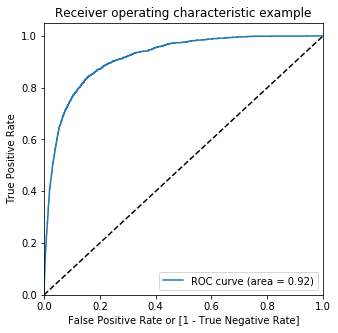

In [160]:
y_train_pred = xgb_model.predict_proba(df_train_pca)[:,1]

y_train_pred_final = df_predictions(y_train, y_train_pred, 0.5)

draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_Prob)

     prob  accuracy     sensi     speci
0.0   0.0  0.086400  1.000000  0.000000
0.1   0.1  0.146332  0.999449  0.065652
0.2   0.2  0.501309  0.982369  0.455815
0.3   0.3  0.693388  0.935537  0.670488
0.4   0.4  0.807064  0.872176  0.800907
0.5   0.5  0.866330  0.802755  0.872343
0.6   0.6  0.897606  0.734986  0.912985
0.7   0.7  0.916361  0.664463  0.940183
0.8   0.8  0.926072  0.559229  0.960765
0.9   0.9  0.924835  0.216529  0.991820


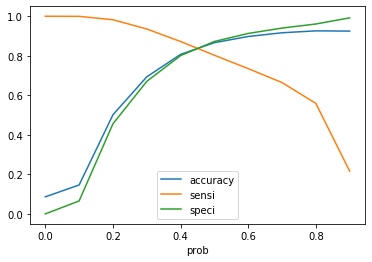

In [161]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plot_cutoff_df(y_train_pred_final)

##### Based upon above graph; decide the probability cutoff for churn label

In [162]:
final_cutoff = 0.45
y_train_pred_final['churn_predicted'] = y_train_pred_final.churn_Prob.map( lambda x: 1 if x > final_cutoff else 0)
# Let's see the head
print(y_train_pred_final[y_train_pred_final['churn']==0].head())
print(y_train_pred_final[y_train_pred_final['churn']==1].head())

   churn  CustID  churn_Prob  churn_predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0   76985    0.595827                1    1    1    1    1    1    1    0    0    0    0
1      0   77814    0.588159                1    1    1    1    1    1    1    0    0    0    0
2      0   24787    0.163682                0    1    1    0    0    0    0    0    0    0    0
3      0   60192    0.430009                0    1    1    1    1    1    0    0    0    0    0
4      0   69896    0.122989                0    1    1    0    0    0    0    0    0    0    0
    churn  CustID  churn_Prob  churn_predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
7       1   70529    0.531700                1    1    1    1    1    1    1    0    0    0    0
47      1   77789    0.691731                1    1    1    1    1    1    1    1    0    0    0
52      1   34851    0.926109                1    1    1    1    1    1    1    1    1    1    1
55      1   54516    0.354309       

In [163]:
model_eval(y_train_pred_final)

Confusion Matrix -> 
# Predicted 	 notchurn 	 churn
# Actual
# not_churn	 16174 		 3018
# churn		 286 		 1529

Classification Report -> 
              precision    recall  f1-score   support

           0       0.98      0.84      0.91     19192
           1       0.34      0.84      0.48      1815

    accuracy                           0.84     21007
   macro avg       0.66      0.84      0.69     21007
weighted avg       0.93      0.84      0.87     21007


Sensitivity (True Positive rate OR Recall of Churn Label) -> 
0.84

Specificity (True Negative rate OR Recall of Non Churn Label) -> 
0.84

AUC Score ->  0.9164199787101375


##### Model Evaluation for PCA+XGBoost on test data

In [164]:
y_test_pred = xgb_model.predict_proba(df_test_pca)[:, 1]
y_test_pred

array([0.6265692 , 0.17934582, 0.25787112, ..., 0.1629989 , 0.1503444 ,
       0.16277279], dtype=float32)

In [165]:
##### Create a dataframe to make predictions for PCA+XGBoost Forest

In [166]:
y_test_pred_final = df_predictions(y_test, y_test_pred, final_cutoff)

# Let's see the head
print(y_test_pred_final[y_test_pred_final['churn']==0].head())
print(y_test_pred_final[y_test_pred_final['churn']==1].head())

   churn  CustID  churn_Prob  churn_predicted
0      0   50179    0.626569                1
1      0   20587    0.179346                0
2      0   51116    0.257871                0
3      0   70628    0.078681                0
4      0   75091    0.374324                0
    churn  CustID  churn_Prob  churn_predicted
7       1   39792    0.623375                1
20      1   63461    0.888671                1
34      1   69509    0.878912                1
52      1   43937    0.812202                1
65      1   24083    0.108891                0


In [167]:
model_eval(y_test_pred_final)

Confusion Matrix -> 
# Predicted 	 notchurn 	 churn
# Actual
# not_churn	 6928 		 1298
# churn		 158 		 620

Classification Report -> 
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      8226
           1       0.32      0.80      0.46       778

    accuracy                           0.84      9004
   macro avg       0.65      0.82      0.68      9004
weighted avg       0.92      0.84      0.87      9004


Sensitivity (True Positive rate OR Recall of Churn Label) -> 
0.8

Specificity (True Negative rate OR Recall of Non Churn Label) -> 
0.84

AUC Score ->  0.8870324327466301


In [ ]:
pd_coefficients

## Recommend strategies to manage customer churn

#### Potential reasons for churn

1. Roaming and STD users are more likely to churn. This was clearly highlighted in the EDA and the logistic regression model coverged down to include these features with a positive co-efficients .

2. Reduced usage of internet volume and internet plans are also one of the main reasons that why users are churning. Reduced or usage values=0 in the 8th month as compared to last 2 months are also causes of concern.

3. New customers are more likely to churn.Customers whose aon(No of days with the network) is low are the ones churning more when compared to customers who are with the network since long.The observation was captured in the EDA.

4. Reduced or recharges values=0 in the 8th month as compared to last 2 months are also causes of concern.

5. Reduced minutes of usages across all categories are also causes of concern.

6. There can be seen a negative coefficient in logistic regression internet vol attributes indicating a decrease in internet   consumption in the 8 month contributing to the churn.



#### Strategies to withold the customers

1. As seen from the above potential areas causing churn include STD users and roaming users , therefore a more focus in the area    of STD and roaming in lines of pricing/offer is required.
2. It is very clear from the models and EDA that new customers are tending more to churn, hence new customers to the network        should be focused more and should be given better offers.
3. It is also observed that the volume consumption in both 2g and 3g are dropping in the action month of churn users ,              indicating the customers disatisfaction in the internet services offered to them. To the potential customers a better  
   internet plan can be offered to make the customer stay back.